In [ ]:
# load relevant libraries
import numpy as np
import pandas as pd

https://www.kaggle.com/code/artemborzenko/analyze-the-esrb-rating-of-games-dataset

Resource that deals with the same data

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [ ]:


# Use inline so our visualizations display in notebook
%matplotlib inline

# Import the trees from sklearn
from sklearn import tree

# Helper function to split our data
from sklearn.model_selection import train_test_split


# Helper fuctions to evaluate our model.
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score 
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics

# Helper function for hyper-parameter turning.
from sklearn.model_selection import GridSearchCV

# Import our Decision Tree
from sklearn.tree import DecisionTreeClassifier 


# Import our Random Forest 
from sklearn.ensemble import RandomForestClassifier


# Library for visualizing our tree
# If you get an error, run 'conda install python-graphviz' in your terminal (without the quotes).
import graphviz 

In [ ]:
#Import the ESRB data
ESRB = pd.read_csv("Video_games_esrb_rating.csv")
ESRB.esrb_rating.value_counts()

T     689
E     416
ET    403
M     387
Name: esrb_rating, dtype: int64

In [ ]:
ESRB.shape

(1895, 34)

### Because we can do a train test split ourselves later, let's combine this test set and training set for data cleaning purposes.

In [ ]:
#Import the ESRB test data
ESRB_test = pd.read_csv("test_esrb.csv")
ESRB_test.index = range(len(ESRB), len(ESRB)+len(ESRB_test))
ESRB = pd.concat([ESRB, ESRB_test])
ESRB.esrb_rating.value_counts()

T     873
ET    529
E     516
M     477
Name: esrb_rating, dtype: int64

In [ ]:
ESRB

,title,console,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,...,sexual_content,sexual_themes,simulated_gambling,strong_janguage,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence,esrb_rating
0,Monster Jam Steel Titans 2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,E
1,Subnautica: Below Zero,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ET
2,NIER REPLICANT VER.1.22474487139…,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,M
3,Jamestown+,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,ET
4,Neptunia Virtual Stars,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,T
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2390,For Honor,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,M
2391,Victor Vran Overkill Edition,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,M
2392,Danganronpa 1•2 Reload,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,M
2393,Touhou Double Focus,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,T


In [ ]:
print(ESRB.isnull().sum(), ' duplicates ', ESRB.duplicated().sum())


title                       0
console                     0
alcohol_reference           0
animated_blood              0
blood                       0
blood_and_gore              0
cartoon_violence            0
crude_humor                 0
drug_reference              0
fantasy_violence            0
intense_violence            0
language                    0
lyrics                      0
mature_humor                0
mild_blood                  0
mild_cartoon_violence       0
mild_fantasy_violence       0
mild_language               0
mild_lyrics                 0
mild_suggestive_themes      0
mild_violence               0
no_descriptors              0
nudity                      0
partial_nudity              0
sexual_content              0
sexual_themes               0
simulated_gambling          0
strong_janguage             0
strong_sexual_content       0
suggestive_themes           0
use_of_alcohol              0
use_of_drugs_and_alcohol    0
violence                    0
esrb_ratin

In [ ]:
# ESRB['title'][ESRB['title'] == ].index[0]
for i in ESRB['title'][ESRB.duplicated()]:
    occur1 = ESRB['title'][ESRB['title'] == i].index[0]
    occur2 = ESRB['title'][ESRB['title'] == i].index[1]
    print(occur1, ESRB['title'][occur1], occur2, ESRB['title'][occur2], sep='\n')


1894
Surf World Series
1896
Surf World Series
1753
Windjammers
1898
Windjammers
691
Duck Game
1919
Duck Game
1771
3D MiniGolf
1939
3D MiniGolf
1663
Paranormal Activity: The Lost Soul
1947
Paranormal Activity: The Lost Soul
546
ICEY
1960
ICEY
46
Fortnite
1988
Fortnite
1587
Fallen Legion: Sins of an Empire
2007
Fallen Legion: Sins of an Empire
1950
The Girl and the Robot
2055
The Girl and the Robot
1735
Island Flight Simulator
2062
Island Flight Simulator
1703
Nex Machina
2064
Nex Machina
2042
Elite Dangerous: Legendary Edition
2067
Elite Dangerous: Legendary Edition
1996
Unbox - Newbie's Adventure
2096
Unbox - Newbie's Adventure
1664
Future Unfolding
2122
Future Unfolding
132
Human Fall Flat
2130
Human Fall Flat
387
Polybius
2136
Polybius
1721
River City Melee: Battle Royal Special
2156
River City Melee: Battle Royal Special
1538
Wonder Boy: The Dragon's Trap
2194
Wonder Boy: The Dragon's Trap
1373
Aaero
2199
Aaero
1168
Cosmic Star Heroine
2200
Cosmic Star Heroine
1419
Kero Blaster
2203

### I think we can delete these duplicates without issue

In [ ]:
ESRB = ESRB.drop_duplicates()
print(ESRB.duplicated().sum())
print(ESRB.shape)

0
(2371, 34)


### Let's try to find the titles from our ESRB dataset inside this PS4 dataset which has release dates

https://www.kaggle.com/datasets/shivamb/all-playstation-4-games

In [ ]:
#Import the PS4 data 
PS4 = pd.read_csv("playstation_4_games.csv")
PS4

,ID,GamePSID,GameName,Publisher,ReleaseYear,ReleaseDate,Developer,Genre,Features,Size,Medium,Hardware,CompletionTime(Hours),is_Digital_game,is_Physical_game,OfficialWebsite
0,1,3045,Q*Bert Rebooted,LOOT Interactive,2015.0,2015-02-17,Gonzo Games,Action,"PS Plus, PS Now",109.00,NaN,NaN,NaN,0,0,http://www.sidelineamusements.com/qbert/
1,2,3051,Q*Bert Rebooted (EU),LOOT Interactive,2015.0,2015-07-22,LOOT Interactive,Action,PS Now,127.00,Digital only,NaN,NaN,0,0,http://www.sidelineamusements.com/qbert/
2,3,6703,Q.U.B.E. 2,Trapped Nerve Games,2018.0,2018-03-13,Toxic Games,"Puzzle, Platformer",NaN,2682.88,Digital only,NaN,NaN,0,0,http://qube-game.com/
3,4,3403,Q.U.B.E. Director's Cut,GRIP Digital,2015.0,2015-07-21,Toxic Games,"Puzzle, Platformer",PS Plus,1945.60,Digital only,NaN,3-4,0,0,http://qube-game.com/
4,5,13176,Quake (PS4),Bethesda Softworks,2021.0,2021-08-19,"MachineGames, Nightdive Studios, id Software",First Person Shooter,NaN,NaN,Physical and Digital,NaN,NaN,0,0,https://bethesda.net/en/game/quake
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9681,9682,10928,9th Dawn III,Valorware,2020.0,2020-10-06,Valorware,"Open World, Action-RPG, Role Playing",NaN,653.00,Physical and Digital,NaN,NaN,0,0,https://valorware.squarespace.com/9th-dawn-iii
9682,9683,10929,9th Dawn III (EU),Valorware,2020.0,2020-10-06,Valorware,"Open World, Action-RPG, Role Playing",NaN,653.00,Digital only,NaN,NaN,0,0,https://valorware.squarespace.com/9th-dawn-iii
9683,9684,7114,n Verlore Verstand,Skobbejak Games,2018.0,2018-06-12,Skobbejak Games,"Puzzle, Adventure, Platformer",NaN,2170.88,Digital only,NaN,NaN,0,0,http://skobbejakgames.com/n-verlore-verstand/
9684,9685,7110,n Verlore Verstand (EU),Skobbejak Games,2018.0,2018-06-12,Skobbejak Games,"Puzzle, Adventure, Platformer",NaN,2170.88,Digital only,NaN,NaN,0,0,http://skobbejakgames.com/n-verlore-verstand/


In [ ]:
print(PS4.isnull().sum(), ' duplicates ', PS4.duplicated().sum())

ID                          0
GamePSID                    0
GameName                    0
Publisher                 722
ReleaseYear               734
ReleaseDate               734
Developer                 699
Genre                     788
Features                 7937
Size                     2020
Medium                    749
Hardware                 8174
CompletionTime(Hours)    7456
is_Digital_game             0
is_Physical_game            0
OfficialWebsite          1597
dtype: int64  duplicates  0


### I guess any dates that are missing from the PS4 data set could cause problems, so we should drop those

In [ ]:
PS4 = PS4[PS4['ReleaseDate'].notna()]
print(PS4.isnull().sum())

ID                          0
GamePSID                    0
GameName                    0
Publisher                  18
ReleaseYear                 0
ReleaseDate                 0
Developer                   0
Genre                      82
Features                 7206
Size                     1298
Medium                     39
Hardware                 7454
CompletionTime(Hours)    6722
is_Digital_game             0
is_Physical_game            0
OfficialWebsite          1543
dtype: int64


### Let's see if we can make the titles in the two dataset as uniform as we can

In [ ]:
#CLean the ESRB Data
for i in range(0, len(ESRB)):
    try:
        a = ESRB['title'][i]
        ESRB['title'][i] = str(ESRB['title'][i]).rstrip().lstrip()
        b = ESRB['title'][i]
        if a != b:
            print('[', end ='')
            for k in a:
                print(k, end = '')
            print(']')
            print('[', end ='')
            for k in b:
                print(k, end = '')
            print(']')
    except:
        continue

[Les Sims™ 4 Escapade enneigée ]
[Les Sims™ 4 Escapade enneigée]
[Art of Fighting Anthology ]
[Art of Fighting Anthology]


C:\Users\VAIO\AppData\Local\Temp/ipykernel_18364/1009598244.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ESRB['title'][i] = str(ESRB['title'][i]).rstrip().lstrip()


[Hotline Miami 2: Wrong Number ]
[Hotline Miami 2: Wrong Number]
[Port Royale 4 ]
[Port Royale 4]
[Tin and Kuna ]
[Tin and Kuna]
[Les Sims™ 4 Star Wars™: Voyage sur Batuu ]
[Les Sims™ 4 Star Wars™: Voyage sur Batuu]
[Los Sims™ 4 Star Wars™: Viaje a Batuu ]
[Los Sims™ 4 Star Wars™: Viaje a Batuu]
[Watch Dogs Legion ]
[Watch Dogs Legion]
[Mystik Belle ]
[Mystik Belle]
[Pathfinder: Kingmaker - Definitive Edition ]
[Pathfinder: Kingmaker - Definitive Edition]
[Samurai Shodown V Special ]
[Samurai Shodown V Special]
[Gigantosaurus The Game ]
[Gigantosaurus The Game]
[One Piece: Pirate Warriors 4 ]
[One Piece: Pirate Warriors 4]
[Dynasty Warriors 9 Special Weapon Edition ]
[Dynasty Warriors 9 Special Weapon Edition]
[My Friend Pedro ]
[My Friend Pedro]
[Slay the Spire ]
[Slay the Spire]
[Growtopia ]
[Growtopia]
[Damascus Gear: Operation Osaka ]
[Damascus Gear: Operation Osaka]
[Defender's Quest: Valley of the Forgotten ]
[Defender's Quest: Valley of the Forgotten]
[World of Warships Legends 

### It seems that we removed spaces at the ends of titles. Let's do the same to the PS4 dataset

In [ ]:
print(ESRB.duplicated().sum())
print(ESRB.shape)
ESRB.title.duplicated().sum()

3
(2371, 34)


46

In [ ]:
ESRB = ESRB.drop_duplicates()
print(ESRB.duplicated().sum())
print(ESRB.shape)
ESRB

0
(2368, 34)


,title,console,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,...,sexual_content,sexual_themes,simulated_gambling,strong_janguage,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence,esrb_rating
0,Monster Jam Steel Titans 2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,E
1,Subnautica: Below Zero,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ET
2,NIER REPLICANT VER.1.22474487139…,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,M
3,Jamestown+,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,ET
4,Neptunia Virtual Stars,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,T
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2390,For Honor,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,M
2391,Victor Vran Overkill Edition,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,M
2392,Danganronpa 1•2 Reload,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,M
2393,Touhou Double Focus,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,T


In [ ]:
ESRB.title.duplicated().sum()
ESRB.drop_duplicates(subset='title', keep='first', inplace=False, ignore_index=False)
ESRB.title.duplicated().sum()


43

### we need to get rid of those duplicate title rows, and I can't figure out why drop_duplicates is not doing that

In [ ]:
titleList = list()
indexSet = set()
for i in ESRB.index:
    if ESRB['title'][i] not in titleList:
        titleList.append(ESRB['title'][i])
        
    else:
        indexSet.add(i)
print(len(indexSet))

#ESRB.drop(indexSet, axis=0, inplace=True)

43


In [ ]:
ESRB.drop(indexSet, axis=0, inplace=True)
ESRB.title.duplicated().sum()
ESRB

,title,console,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,...,sexual_content,sexual_themes,simulated_gambling,strong_janguage,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence,esrb_rating
0,Monster Jam Steel Titans 2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,E
1,Subnautica: Below Zero,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ET
2,NIER REPLICANT VER.1.22474487139…,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,M
3,Jamestown+,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,ET
4,Neptunia Virtual Stars,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,T
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2390,For Honor,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,M
2391,Victor Vran Overkill Edition,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,M
2392,Danganronpa 1•2 Reload,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,M
2393,Touhou Double Focus,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,T


### So thats done with. Now let's see if we can clean the PS4 dataset

In [ ]:
#CLean the PS4 Data
for i in range(0, len(PS4)):
    try:

        a = PS4['GameName'][i]
        PS4['GameName'][i] = PS4['GameName'][i].rstrip().lstrip()
        b = PS4['GameName'][i]
        if a != b:
            print('[', end ='')
            for k in a:
                print(k, end = '')
            print(']')
            print('[', end ='')
            for k in b:
                print(k, end = '')
            print(']')
    except:
        continue

C:\Users\VAIO\AppData\Local\Temp/ipykernel_18364/1449521845.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PS4['GameName'][i] = PS4['GameName'][i].rstrip().lstrip()


   ### Seems like no change to the PS4 dataset

In [ ]:
PerfectMatches = set()
for i in ESRB.title:
    for j in PS4.GameName:
        if str(i).lower() == str(j).lower():
            PerfectMatches.add(i)
print( (len(PerfectMatches)/len(ESRB))*100, '% of our ESRB titles can be found exactly in the PS4 dataset')

74.53763440860214 % of our ESRB titles can be found exactly in the PS4 dataset


### Seems promising, let'stry to add these release dates to our ESRB dataset

In [ ]:
ESRB["ReleaseDate"] = np.NaN
ESRB.ReleaseDate.value_counts( dropna = False)

NaN    2325
Name: ReleaseDate, dtype: int64

In [ ]:
for i in ESRB.title:
    for j in PS4.GameName:
        if str(i).lower() == str(j).lower():
            ESRB['ReleaseDate'][ ESRB['title'][ESRB['title'] == i].index[0] ] = PS4['ReleaseDate'][ PS4['GameName'][PS4['GameName'] == j].index[0] ]
print( 100 - (ESRB.ReleaseDate.isnull().sum()/len(ESRB))*100, '% of our ESRB titles now have ReleaseDate data')

C:\Users\VAIO\AppData\Local\Temp/ipykernel_18364/3215207343.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ESRB['ReleaseDate'][ ESRB['title'][ESRB['title'] == i].index[0] ] = PS4['ReleaseDate'][ PS4['GameName'][PS4['GameName'] == j].index[0] ]
C:\Users\VAIO\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


74.53763440860214 % of our ESRB titles now have ReleaseDate data


### Great! exactly as we estimated. Let's investigate those which still don't have release dates. Perhaps they're close matches

In [ ]:
for i in ESRB.title[ESRB.ReleaseDate.isna()]:
    for j in PS4.GameName:
        if str(i).lower() in str(j).lower():
            print(i, '=?', j)

Subnautica: Below Zero =? Subnautica: Below Zero (PS4)
Monster Energy Supercross - The Official Videogame 4 =? Monster Energy Supercross - The Official Videogame 4 (PS4)
Maquette =? Maquette (Asia) (PS4)
Maquette =? Maquette (EU) (PS4)
Maquette =? Maquette (JP) (PS4)
Maquette =? Maquette (PS4)
Turrican Flashback =? Turrican Flashback Collection
Turrican Flashback =? Turrican Flashback Collection (EU)
Sniper Ghost Warrior Contracts 2 =? Sniper Ghost Warrior Contracts 2 (JP) (PS4)
Sniper Ghost Warrior Contracts 2 =? Sniper Ghost Warrior Contracts 2 (PS4)
Bibi & Tina at the Horse Farm =? Bibi & Tina at the horse farm (EU) (PS4)
Bibi & Tina at the Horse Farm =? Bibi & Tina at the horse farm (PS4)
Bugsnax =? Bugsnax (PS4)
Worms Rumble =? Worms Rumble (PS4)
BALAN WONDERWORLD =? Balan Wonderworld (PS4)
HITMAN 3 =? HITMAN 3 (PS4)
Fortnite =? Fortnite (EU) (PS4)
Fortnite =? Fortnite (PS4)
Werewolf: The Apocalypse - Earthblood =? Werewolf: The Apocalypse - Earthblood (PS4)
Marvel's Spider-Man: M

### There are definitely still matches that I can see which don't seem to have been captured. One reason might be that the " (PS4)" tag in the PS4 dataset is messing up some of our comparisons. It's likely there to begin with because the game came out on PC first, so let's try finding perfect matches when ignoring it.

In [ ]:
for i in ESRB.title[ESRB.ReleaseDate.isna()]:
    for j in PS4.GameName:
        if str(i).lower() == str(j).replace(' (PS4)', '').lower() and str(PS4.ReleaseDate[ PS4.GameName[PS4.GameName == j].index[0]]) != 'nan':
            print(i, '=', j.replace(' (PS4)', ''))

Subnautica: Below Zero = Subnautica: Below Zero
Monster Energy Supercross - The Official Videogame 4 = Monster Energy Supercross - The Official Videogame 4
Maquette = Maquette
Sniper Ghost Warrior Contracts 2 = Sniper Ghost Warrior Contracts 2
Bibi & Tina at the Horse Farm = Bibi & Tina at the horse farm
Bugsnax = Bugsnax
Worms Rumble = Worms Rumble
BALAN WONDERWORLD = Balan Wonderworld
HITMAN 3 = HITMAN 3
Fortnite = Fortnite
Werewolf: The Apocalypse - Earthblood = Werewolf: The Apocalypse - Earthblood
Marvel's Spider-Man: Miles Morales = Marvel's Spider-Man: Miles Morales
Spacebase Startopia = Spacebase Startopia
Puyo Puyo Tetris 2 = Puyo Puyo Tetris 2
Mortal Shell = Mortal Shell
Sackboy: A Big Adventure = Sackboy: A Big Adventure
Little Nightmares II = Little Nightmares II
DIRT 5 = DiRT 5
FIFA 21 = FIFA 21
Monster Truck Championship = Monster Truck Championship
Just Dance 2021 = Just Dance 2021
Port Royale 4 = Port Royale 4
Immortals Fenyx Rising = Immortals Fenyx Rising
The Pathless

### That seems to make many titles match. Let's try adding the release dates of those games to the ESRB dataset 

In [ ]:
for i in ESRB.title[ESRB.ReleaseDate.isna()]:
    for j in PS4.GameName:
        if str(i).lower() == str(j).replace(' (PS4)', '').lower():
            ESRB['ReleaseDate'][ ESRB['title'][ESRB['title'] == i].index[0] ] = PS4['ReleaseDate'][ PS4['GameName'][PS4['GameName'] == j].index[0] ]
print( 100 - (ESRB.ReleaseDate.isna().sum()/len(ESRB))*100, '% of our ESRB titles now have ReleaseDate data')

77.46236559139786 % of our ESRB titles now have ReleaseDate data


### Only a slight improvement. Let's see what the other matches which we didn't catch were

In [ ]:
for i in ESRB.title[ESRB.ReleaseDate.isna()]:
    for j in PS4.GameName:
        if str(i).lower() in str(j).lower():
            print('[',str(i).lower(), ']', ESRB['ReleaseDate'][ ESRB['title'][ESRB['title'] == i].index[0] ] ,'= [', str(j).lower(), ']', PS4['ReleaseDate'][ PS4['GameName'][PS4['GameName'] == j].index[0] ])

[ turrican flashback ] nan = [ turrican flashback collection ] 2021-01-29
[ turrican flashback ] nan = [ turrican flashback collection (eu) ] 2021-01-29
[ umihara kawase bazooka ] nan = [ umihara kawase bazooka! ] 2020-10-30
[ umihara kawase bazooka ] nan = [ umihara kawase bazooka! (jp) ] 2020-05-28
[ fall guys ] nan = [ fall guys: ultimate knockout ] 2020-08-04
[ ufc 4 ] nan = [ ea sports ufc 4 ] 2020-08-14
[ my baby ] nan = [ my universe - my baby ] 2021-01-26
[ indigo prophecy ] nan = [ fahrenheit - indigo prophecy ] 2016-08-10
[ yakuza 5 ] nan = [ yakuza 5 remastered ] 2020-02-11
[ yakuza 5 ] nan = [ yakuza 5 remastered (asia) ] 2019-06-20
[ daymare: 1998 ] nan = [ daymare: 1998 (jp) ] 2020-02-20
[ galak-z ] nan = [ galak-z: the dimensional ] 2015-08-04
[ galak-z ] nan = [ galak-z: the dimensional (eu) ] 2015-08-05
[ yakuza 4 ] nan = [ yakuza 4 remastered ] 2019-10-29
[ yakuza 4 ] nan = [ yakuza 4 remastered (asia) ] 2019-01-17
[ amoeba battle ] nan = [ amoeba battle - microscopic

### This looks good, I don't see any exact matches. Let's just try a manual sort machine

In [ ]:
def ifXsameAsYthenAisB(x, y, a, b, chars): #x = ESRB['title'] of NaN date, y = PS4['GameName'], a = ESRB['ReleaseDate'], b = PS4['ReleaseDate']
    for i in x:
        for j in y:
            #if all([char in j for char in chars]):
            if '(Asia)' in j:
                continue
            if '(EU)' in j:
                continue
            if '(JP)' in j:
                continue
            if '(HK/TW)' in j:
                continue
            else:
                if str(i) in str(j) and str(b[ y[y == j].index[0]]) != 'nan':
                    print(b[ y[y == j].index[0] ])
                    print("Is \n", i, "\n the same game as\n", j, "  ?\n enter 'y' for yes, 'n' for no")
                    answer = input('>>>')
                    if answer == 'y':
                        a[ x[x == i].index[0] ] = b[ y[y == j].index[0] ]
                        print(a[ x[x == i].index[0] ], '=', b[ y[y == j].index[0] ])
                    

ifXsameAsYthenAisB(ESRB.title[ESRB.ReleaseDate.isna()], PS4.GameName, ESRB['ReleaseDate'], PS4['ReleaseDate'], ['(Asia)', '(EU)', '(JP)', '(HK/TW)'])  

2021-01-29
Is 
 Turrican Flashback 
 the same game as
 Turrican Flashback Collection   ?
 enter 'y' for yes, 'n' for no


>>> n


2020-08-04
Is 
 Fall Guys 
 the same game as
 Fall Guys: Ultimate Knockout   ?
 enter 'y' for yes, 'n' for no


>>> n


2021-01-26
Is 
 My Baby 
 the same game as
 My Universe - My Baby   ?
 enter 'y' for yes, 'n' for no


>>> n


2020-02-11
Is 
 Yakuza 5 
 the same game as
 Yakuza 5 Remastered   ?
 enter 'y' for yes, 'n' for no


>>> n


2019-10-29
Is 
 Yakuza 4 
 the same game as
 Yakuza 4 Remastered   ?
 enter 'y' for yes, 'n' for no


>>> n


2019-08-05
Is 
 Corpse Killer 
 the same game as
 Corpse Killer - 25th Anniversary Edition   ?
 enter 'y' for yes, 'n' for no


>>> n


2019-08-20
Is 
 Yakuza 3 
 the same game as
 Yakuza 3 Remastered   ?
 enter 'y' for yes, 'n' for no


>>> n


2017-05-31
Is 
 Damascus Gear: Operation Tokyo 
 the same game as
 Damascus Gear: Operation Tokyo HD Edition   ?
 enter 'y' for yes, 'n' for no


>>> n


2018-02-21
Is 
 Defender's Quest: Valley of the Forgotten 
 the same game as
 Defender's Quest: Valley of the Forgotten DX   ?
 enter 'y' for yes, 'n' for no


>>> n


2018-11-09
Is 
 Tetris Effect 
 the same game as
 Tetris Effect: Connected   ?
 enter 'y' for yes, 'n' for no


>>> n


2021-10-19
Is 
 Youtubers Life 
 the same game as
 Youtubers Life 2   ?
 enter 'y' for yes, 'n' for no


>>> n


2018-10-31
Is 
 Death Mark 
 the same game as
 Spirit Hunter: Death Mark   ?
 enter 'y' for yes, 'n' for no


>>> n


2018-09-25
Is 
 Hollow Knight 
 the same game as
 Hollow Knight: Voidheart Edition   ?
 enter 'y' for yes, 'n' for no


>>> n


2018-08-21
Is 
 Fall of Light 
 the same game as
 Fall of Light: Darkest Edition   ?
 enter 'y' for yes, 'n' for no


>>> n


2016-07-05
Is 
 Banner Saga 2 
 the same game as
 The Banner Saga 2   ?
 enter 'y' for yes, 'n' for no


>>> y


C:\Users\VAIO\AppData\Local\Temp/ipykernel_18364/3861314418.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a[ x[x == i].index[0] ] = b[ y[y == j].index[0] ]


2016-07-05 = 2016-07-05
2020-08-20
Is 
 Train Sim World 
 the same game as
 Train Sim World 2: Set 1 (PS4)   ?
 enter 'y' for yes, 'n' for no


>>> n


2020-08-20
Is 
 Train Sim World 
 the same game as
 Train Sim World 2: Set 2 (PS4)   ?
 enter 'y' for yes, 'n' for no


>>> n


2020-08-20
Is 
 Train Sim World 
 the same game as
 Train Sim World 2: Set 3 (PS4)   ?
 enter 'y' for yes, 'n' for no


>>> n


2018-07-24
Is 
 Train Sim World 
 the same game as
 Train Sim World 2020: Set 1   ?
 enter 'y' for yes, 'n' for no


>>> n


2018-07-24
Is 
 Train Sim World 
 the same game as
 Train Sim World 2020: Set 2   ?
 enter 'y' for yes, 'n' for no


>>> n


2018-07-26
Is 
 Game Tengoku CruisinMix 
 the same game as
 Game Tengoku CruisinMix Special   ?
 enter 'y' for yes, 'n' for no


>>> n


2018-04-26
Is 
 Home Run Derby VR 
 the same game as
 MLB Home Run Derby VR   ?
 enter 'y' for yes, 'n' for no


>>> y


2018-04-26 = 2018-04-26
2020-06-09
Is 
 Epic Dumpster Bear 
 the same game as
 Epic Dumpster Bear 2: He Who Bears Wins   ?
 enter 'y' for yes, 'n' for no


>>> n


2018-04-03
Is 
 Epic Dumpster Bear 
 the same game as
 Epic Dumpster Bear: Dumpster Fire Redux   ?
 enter 'y' for yes, 'n' for no


>>> n


2017-02-21
Is 
 Typoman 
 the same game as
 Typoman: Revised   ?
 enter 'y' for yes, 'n' for no


>>> n


2017-12-09
Is 
 LocoRoco 2 
 the same game as
 LocoRoco 2 Remastered   ?
 enter 'y' for yes, 'n' for no


>>> n


2017-10-24
Is 
 Slayaway Camp 
 the same game as
 Slayaway Camp: Butcher's Cut   ?
 enter 'y' for yes, 'n' for no


>>> n


2018-03-06
Is 
 TT Isle of Man 
 the same game as
 TT Isle of Man: Ride on the Edge   ?
 enter 'y' for yes, 'n' for no


>>> n


2020-03-19
Is 
 TT Isle of Man 
 the same game as
 TT Isle of Man: Ride on the Edge 2   ?
 enter 'y' for yes, 'n' for no


>>> n


2017-08-29
Is 
 Pillars of Eternity 
 the same game as
 Pillars of Eternity: Complete Edition   ?
 enter 'y' for yes, 'n' for no


>>> n


2017-08-23
Is 
 Jak and Daxter 
 the same game as
 Jak and Daxter: The Precursor Legacy   ?
 enter 'y' for yes, 'n' for no


>>> n


2017-06-20
Is 
 Dead by Daylight 
 the same game as
 Dead by Daylight 1/2 (PS4)   ?
 enter 'y' for yes, 'n' for no


>>> n


2017-06-20
Is 
 Dead by Daylight 
 the same game as
 Dead by Daylight 2/2 (PS4)   ?
 enter 'y' for yes, 'n' for no


>>> n


2017-08-29
Is 
 Redout 
 the same game as
 Redout: Lightspeed Edition   ?
 enter 'y' for yes, 'n' for no


>>> n


2021-01-22
Is 
 Redout 
 the same game as
 Redout: Space Assault   ?
 enter 'y' for yes, 'n' for no


>>> n


2017-04-18
Is 
 Spear of Destiny 
 the same game as
 Spear of Destiny The Kaiseki   ?
 enter 'y' for yes, 'n' for no


>>> n


2017-04-18
Is 
 VR Invaders 
 the same game as
 VR Invaders - Complete Edition   ?
 enter 'y' for yes, 'n' for no


>>> y


2017-04-18 = 2017-04-18


In [ ]:
print( 100 - (ESRB.ReleaseDate.isna().sum()/len(ESRB))*100, '% of our ESRB titles now have ReleaseDate data')

78.23655913978494 % of our ESRB titles now have ReleaseDate data


### It doesn't look like there are anymore obvious close matches. Let's try reversing it.


In [ ]:
for i in ESRB.title[ESRB.ReleaseDate.isna()]:
    for j in PS4.GameName:
        if str(j).lower() in str(i).lower():
            print('[',str(i).lower(), ']', ESRB['ReleaseDate'][ ESRB['title'][ESRB['title'] == i].index[0] ] ,'= [', str(j).lower(), ']', PS4['ReleaseDate'][ PS4['GameName'][PS4['GameName'] == j].index[0] ])

[ fallout 76: steel dawn ] nan = [ fallout 76 ] 2018-11-14
[ override 2: super mech league – ultraman deluxe edition ] nan = [ ride ] 2015-03-27
[ override 2: super mech league – ultraman deluxe edition ] nan = [ ride 2 ] 2016-10-07
[ override 2: super mech league – ultraman deluxe edition ] nan = [ io ] 2017-02-14
[ turrican flashback ] nan = [ flashback ] 2018-11-20
[ five nights at freddy's: help wanted ] nan = [ five nights at freddy's ] 2019-11-29
[ five nights at freddy's: core collection ] nan = [ io ] 2017-02-14
[ five nights at freddy's: core collection ] nan = [ five nights at freddy's ] 2019-11-29
[ ea sports™ fifa 21 édition nxt lvl ] nan = [ io ] 2017-02-14
[ ea sports™ fifa 21 nxt level edition ] nan = [ io ] 2017-02-14
[ ea sports™ madden nfl 21 édition nxt lvl ] nan = [ io ] 2017-02-14
[ ea sports™ madden nfl 21 nxt level edition ] nan = [ io ] 2017-02-14
[ metal slug anthology™ ] nan = [ metal slug anthology ] 2016-07-05
[ need for speed hot pursuit remastered ] nan = 

### lets try to filter out the very short titles to get a better view

In [ ]:
clogs = ['rive', 'hunt', 'zomb', 'below', 'steep', 'fight' ,'rad', 'descent', 'destiny', 'golf', 'fe', 'io']
for i in ESRB.title[ESRB.ReleaseDate.isna()]:
    for j in PS4.GameName:
        if str(j).lower() in clogs:
            continue
        if str(j).lower() in str(i).lower():
            print('[' ,str(j).lower(), ']', PS4['ReleaseDate'][ PS4['GameName'][PS4['GameName'] == j].index[0] ], ' = [',str(i).lower(), ']', ESRB['ReleaseDate'][ ESRB['title'][ESRB['title'] == i].index[0] ])

[ fallout 76 ] 2018-11-14  = [ fallout 76: steel dawn ] nan
[ ride ] 2015-03-27  = [ override 2: super mech league – ultraman deluxe edition ] nan
[ ride 2 ] 2016-10-07  = [ override 2: super mech league – ultraman deluxe edition ] nan
[ flashback ] 2018-11-20  = [ turrican flashback ] nan
[ five nights at freddy's ] 2019-11-29  = [ five nights at freddy's: help wanted ] nan
[ five nights at freddy's ] 2019-11-29  = [ five nights at freddy's: core collection ] nan
[ metal slug anthology ] 2016-07-05  = [ metal slug anthology™ ] nan
[ need for speed ] 2015-11-03  = [ need for speed hot pursuit remastered ] nan
[ coaster ] 2020-06-22  = [ planet coaster console edition ] nan
[ the walking dead ] 2014-10-14  = [ the walking dead: saints & sinners - complete edition ] nan
[ the walking dead: saints & sinners ] 2020-05-05  = [ the walking dead: saints & sinners - complete edition ] nan
[ form ] 2020-04-07  = [ transformers:battlegrounds ] nan
[ nhl 21 ] 2020-10-16  = [ nhl 21 great eight ed

### The remaining titles are vague and I don't think we're going to get much further with the PS4 dataset. Let's try another dataset

In [ ]:
ESRB.to_csv('ESRB2.csv', index=False)

In [ ]:
vgs = pd.read_csv('vgsales.csv')
vgs.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [ ]:
vgs.Platform.value_counts()

DS      2163
PS2     2161
PS3     1329
Wii     1325
X360    1265
PSP     1213
PS      1196
PC       960
XB       824
GBA      822
GC       556
3DS      509
PSV      413
PS4      336
N64      319
SNES     239
XOne     213
SAT      173
WiiU     143
2600     133
NES       98
GB        98
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64

In [ ]:
PSvgs = vgs.loc[(vgs['Platform'] == 'PS2') | (vgs['Platform'] == 'PS3') | (vgs['Platform'] == 'PS4') | (vgs['Platform'] == 'PS')]

In [ ]:
for i in ESRB.title[ESRB.ReleaseDate.isna()]:
    for j in vgs.Name:
        if  str(j).lower().rstrip().lstrip() == str(i).lower() and vgs['Year'][ vgs['Name'][vgs['Name'] == j].index[0] ]:
            ESRB['ReleaseDate'][ ESRB['title'][ESRB['title'] == i].index[0] ] = vgs['Year'][ vgs['Name'][vgs['Name'] == j].index[0] ]
print( 100 - (ESRB.ReleaseDate.isnull().sum()/len(ESRB))*100, '% of our ESRB titles now have ReleaseDate data')

C:\Users\VAIO\AppData\Local\Temp/ipykernel_18364/1873808603.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ESRB['ReleaseDate'][ ESRB['title'][ESRB['title'] == i].index[0] ] = vgs['Year'][ vgs['Name'][vgs['Name'] == j].index[0] ]


78.70967741935485 % of our ESRB titles now have ReleaseDate data


In [ ]:
df = ESRB

In [ ]:
df[df["no_descriptors"] == 1].esrb_rating.value_counts()

E     310
T      41
ET     15
M       4
Name: esrb_rating, dtype: int64

In [ ]:
test_df = df[df["no_descriptors"] == 1]

In [ ]:
test_df[test_df["esrb_rating"] == "M"]

,title,console,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,...,sexual_themes,simulated_gambling,strong_janguage,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence,esrb_rating,ReleaseDate
260,Maneater,1,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,M,2020-05-22
626,Observation,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,M,2019-05-21
682,Tharsis,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,M,2016-01-12
1387,Frostpunk,1,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,M,2019-10-11


Data is incorrectly labeled

Removing titles with no descriptors because there is no way to classify them.

Might also want to remove titles with less than a certain number of descriptors.

Should probably add a feature which is number of descriptors.

In [ ]:
df["no_descriptors"].value_counts()

0    1955
1     370
Name: no_descriptors, dtype: int64

In [ ]:
# df = df[df["no_descriptors"] == 0]

In [ ]:
df["no_descriptors"].value_counts()

0    1955
1     370
Name: no_descriptors, dtype: int64

Manually combined the 2 csv files on my own computer. Adds some more data.

The data is already beoken up into 2 csvs 

One for training and the other for testing

Kind of annoying but I could append one to the other and split them myself

In [ ]:
df.shape

(2325, 35)

In [ ]:
df.describe(include="all")

,title,console,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,...,sexual_themes,simulated_gambling,strong_janguage,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence,esrb_rating,ReleaseDate
count,2325,2325.000000,2325.000000,2325.000000,2325.000000,2325.000000,2325.000000,2325.000000,2325.000000,2325.000000,...,2325.000000,2325.000000,2325.000000,2325.000000,2325.000000,2325.000000,2325.000000,2325.000000,2325,1830
unique,2325,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,687
top,Monster Jam Steel Titans 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,T,2018-05-29
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,851,17
mean,NaN,0.478280,0.050323,0.008602,0.231828,0.125161,0.020645,0.051183,0.032688,0.228387,...,0.048602,0.058925,0.105806,0.036989,0.110108,0.029677,0.021505,0.110108,NaN,NaN
std,NaN,0.499635,0.218657,0.092368,0.422090,0.330973,0.142224,0.220418,0.177857,0.419884,...,0.215081,0.235534,0.307656,0.188776,0.313091,0.169732,0.145093,0.313091,NaN,NaN
min,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN


Because almost all of the data is of boolean type describing doesn't do anything

| Feature_name | data_type |	description_of_data |	response_values |
|---|---|---|---|
|"title" |string | Name of the game |____ |
| "console" |	int	| The console on which the game was released |	0 = PS4,1 = PS4 & Xbox_one |
|"alcohol_reference" |	int	| Reference to and/or images of alcoholic beverages |	0 = no, 1 = yes |
| "animated_blood" | int | Discolored and/or unrealistic depictions of blood | 0 = no, 1 = yes
| "blood" |	int	| Depictions of blood | 0 = no, 1 = yes |
| "blood_and_gore"	| int |	Depictions of blood or the mutilation of body parts |	0 = no, 1 = yes |
|"cartoon_violence"	| int |	Violent actions involving cartoon-like situations and characters| May include violence where a character is unharmed after the action has been inflicted |	0 = no, 1 = yes |
|"crude_humor" | int	| Depictions or dialogue involving vulgar antics, including "bathroom" humor | 0 = no, 1 = yes |
|"drug_reference"|	int	| Reference to and/or images of illegal drugs|	0 = no, 1 = yes|
|"fantasy_violence"|	int	|Violent actions of a fantasy nature, involving human or non-human characters in situations easily distinguishable from real life| 0 = no, 1 = yes |
|"intense_violence"	| int |	Graphic and realistic-looking depictions of physical conflict| May involve extreme and/or realistic blood, gore, weapons, and depictions of human injury and death|	0 = no, 1 = yes|
|"language"	| int |	Moderate use of profanity|	0 = no, 1 = yes|
|"lyrics"	| int |	References to profanity, sexuality, violence, alcohol, or drug use in music|	0 = no, 1 = yes |
|"mature_humor"	| int |	Depictions or dialogue involving "adult" humor, including sexual references|	0 = no, 1 = yes |
|"mild_blood"	| int |	Some blood|	0 = no, 1 = yes |
|"mild_cartoon_violence"	| int |	Some violent actions involving cartoon|	0 = no, 1 = yes |
|"mild_fantasy_violence"	| int |	Some violent actions of a fantasy nature|	0 = no, 1 = yes |
|"mild_language"	| int |	Mild to moderate use of profanity|	0 = no, 1 = yes |
|"mild_lyrics"	| int |	Mild References to profanity, sexuality, violence, alcohol, or drug use in music|	0 = no, 1 = yes |
|mild_suggestive_themes"	| int |	some provocative references or materials	0 = no, 1 = yes |
|"mild_violence"	| int |	Some scenes involving aggressive conflict|	0 = no, 1 = yes |
|"no_descriptors"	| int |	No content descriptors|	0 = no, 1 = yes |
|"nudity"	| int |	Graphic or prolonged depictions of nudity|	0 = no, 1 = yes |
|"partial_nudity"	| int |	Brief and/or mild depictions of nudity|	0 = no, 1 = yes |
|"sexual_content"	| int |	Non-explicit depictions of sexual behavior, possibly including partial nudity|	0 = no, 1 = yes |
|"sexual_themes"	| int |	References to sex or sexuality|	0 = no, 1 = yes |
|"simulated_gambling"	| int |	Player can gamble without betting or wagering real cash or currency|	0 = no, 1 = yes |
|"strong_language"	| int |	Explicit and/or frequent use of profanity|	0 = no, 1 = yes |
|"strong_sexual_content"	| int |	Explicit and/or frequent depictions of sexual behavior, possibly including nudity|	0 = no, 1 = yes |
|"suggestive_themes"	| int |	Provocative references or materials|	0 = no, 1 = yes |
|"use_of_alcohol"	| int |	The consumption of alcoholic beverages|	0 = no, 1 = yes |
|"use_of_drugs_and_alcohol"	| int |	The consumption of alcoholic and drugs beverages|	0 = no, 1 = yes |
|"violence"	| int |	Scenes involving aggressive conflict| May contain bloodless dismemberment|	0 = no, 1 = yes |
|"ESRB_rating"|	string	| ratings: rating pending (RP), Early childhood (EC), Everyone (E), Everyone ten years and older (E+10), Teen (T), Mature (M), Adult (A) |	RP , EC , E , ET , T , M , A |

Data dictionary does not copy paste well

Maybe find a different way to display it

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2325 entries, 0 to 2394
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   title                     2325 non-null   object
 1   console                   2325 non-null   int64 
 2   alcohol_reference         2325 non-null   int64 
 3   animated_blood            2325 non-null   int64 
 4   blood                     2325 non-null   int64 
 5   blood_and_gore            2325 non-null   int64 
 6   cartoon_violence          2325 non-null   int64 
 7   crude_humor               2325 non-null   int64 
 8   drug_reference            2325 non-null   int64 
 9   fantasy_violence          2325 non-null   int64 
 10  intense_violence          2325 non-null   int64 
 11  language                  2325 non-null   int64 
 12  lyrics                    2325 non-null   int64 
 13  mature_humor              2325 non-null   int64 
 14  mild_blood              

All columns should be boolean except for Title which should be string

And esrb_rating which should be categorical

In [ ]:
df.columns

Index(['title', 'console', 'alcohol_reference', 'animated_blood', 'blood',
       'blood_and_gore', 'cartoon_violence', 'crude_humor', 'drug_reference',
       'fantasy_violence', 'intense_violence', 'language', 'lyrics',
       'mature_humor', 'mild_blood', 'mild_cartoon_violence',
       'mild_fantasy_violence', 'mild_language', 'mild_lyrics',
       'mild_suggestive_themes', 'mild_violence', 'no_descriptors', 'nudity',
       'partial_nudity', 'sexual_content', 'sexual_themes',
       'simulated_gambling', 'strong_janguage', 'strong_sexual_content',
       'suggestive_themes', 'use_of_alcohol', 'use_of_drugs_and_alcohol',
       'violence', 'esrb_rating', 'ReleaseDate'],
      dtype='object')

The column names follow proper conventions

strong_language is misspelled as

strong_janguage

Should probably rename the column

In [ ]:
df["strong_language"] = df["strong_janguage"]

In [ ]:
df.drop("strong_janguage", axis=1, inplace=True)

Console should not be useful so I am dropping it

In [ ]:
df.drop("console", axis=1, inplace=True)

Going to try an easy way to change the colum  types

In [ ]:
column_names = list(df.columns)

In [ ]:
column_names

['title',
 'alcohol_reference',
 'animated_blood',
 'blood',
 'blood_and_gore',
 'cartoon_violence',
 'crude_humor',
 'drug_reference',
 'fantasy_violence',
 'intense_violence',
 'language',
 'lyrics',
 'mature_humor',
 'mild_blood',
 'mild_cartoon_violence',
 'mild_fantasy_violence',
 'mild_language',
 'mild_lyrics',
 'mild_suggestive_themes',
 'mild_violence',
 'no_descriptors',
 'nudity',
 'partial_nudity',
 'sexual_content',
 'sexual_themes',
 'simulated_gambling',
 'strong_sexual_content',
 'suggestive_themes',
 'use_of_alcohol',
 'use_of_drugs_and_alcohol',
 'violence',
 'esrb_rating',
 'ReleaseDate',
 'strong_language']

In [ ]:
#for name in column_names:
#  if (name == "title"):
#    df["title"] = df.title.astype(str)

#  elif (name == "esrb_rating"):
#    df["esrb_rating"] = df.esrb_rating.astype("category")

#  else:
#    df[name] = df[name].astype(bool)



# do not need to do this


In [ ]:
#df["num_descriptors"] = df['alcohol_reference'] + df['animated_blood'] + df['blood'] + df['blood_and_gore'] + df['cartoon_violence'] + df['crude_humor'] + df['drug_reference'] + df['fantasy_violence'] + df['intense_violence'] + df['language'] + df['lyrics'] + df['mature_humor'] + df['mild_blood'] + df['mild_cartoon_violence'] + df['mild_fantasy_violence'] + df['mild_language'] + df['mild_lyrics'] + df['mild_suggestive_themes'] + df['mild_violence'] + df['nudity'] + df['partial_nudity'] + df['sexual_content'] + df['sexual_themes'] + df['simulated_gambling'] + df['strong_janguage'] + df['strong_sexual_content'] + df['suggestive_themes'] +df['use_of_alcohol'] + df['use_of_drugs_and_alcohol'] + df['violence']

# maybe there is a better way to do this

# better way is below

In [ ]:
list_descriptors = list(df.columns)





In [ ]:
list_descriptors.remove("title")
list_descriptors.remove("esrb_rating")
#list_descriptors.remove("num_descriptors")

In [ ]:
df["num_descriptors"] = df[list_descriptors].sum(axis=1)

C:\Users\VAIO\AppData\Local\Temp/ipykernel_18364/3443474891.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df["num_descriptors"] = df[list_descriptors].sum(axis=1)


In [ ]:
df.head(10)

,title,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,intense_violence,...,simulated_gambling,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence,esrb_rating,ReleaseDate,strong_language,num_descriptors
0,Monster Jam Steel Titans 2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,E,2021-03-02,0,1
1,Subnautica: Below Zero,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,ET,2021-05-14,0,3
2,NIER REPLICANT VER.1.22474487139…,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,M,NaN,1,3
3,Jamestown+,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,ET,2015-03-17,0,3
4,Neptunia Virtual Stars,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,T,2021-03-02,0,3
5,Monster Energy Supercross - The Official Video...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,E,2021-03-11,0,1
6,Monochrome Order,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,1,T,2019-10-08,0,3
7,Blightbound,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,T,2021-07-27,0,2
8,Maquette,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,ET,2021-03-02,0,2
9,FATAL FURY™ BATTLE ARCHIVES VOL.2,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,T,NaN,0,1


In [ ]:
df['num_descriptors'].value_counts()

1    983
2    574
3    395
4    232
5    107
0     18
6     16
Name: num_descriptors, dtype: int64

There seems to be a problem here

We have 19 games that have 0 descriptors but all of those should have been removed

In [ ]:
df[df['num_descriptors'] == 0]

,title,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,intense_violence,...,simulated_gambling,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence,esrb_rating,ReleaseDate,strong_language,num_descriptors
208,Race with Ryan Road Trip Deluxe Edition,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,E,NaN,0,0
322,Cooking Mama: Cookstar,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,E,2021-03-25,0,0
408,Garfield Kart: Furious Racing,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,E,NaN,0,0
430,Race with Ryan,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,E,2019-11-01,0,0
536,Harvest Moon: Mad Dash,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,E,2019-10-29,0,0
543,The Angry Birds Movie 2 VR: Under Pressure,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,E,2019-08-06,0,0
639,Everybody's Golf VR,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,E,2019-05-22,0,0
900,Project Highrise - Architect's Edition,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,ET,NaN,0,0
927,The Golf Club 2019 Featuring the PGA Tour,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,E,NaN,0,0
1265,Old Man's Journey,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,E,2018-05-29,0,0


After looking ino the data these ones have no descriptors but for some reason are improperly labeled in the no_descriptors column as hvaing descriptors

Maybe this is because our data is inomplete and there are more descriptors used in the actual review of games

For now I shall remove these games

In [ ]:
# df = df[df["num_descriptors"] != 0]

In [ ]:
df['num_descriptors'].value_counts()

1    983
2    574
3    395
4    232
5    107
0     18
6     16
Name: num_descriptors, dtype: int64

In [ ]:
df.dtypes

title                       object
alcohol_reference            int64
animated_blood               int64
blood                        int64
blood_and_gore               int64
cartoon_violence             int64
crude_humor                  int64
drug_reference               int64
fantasy_violence             int64
intense_violence             int64
language                     int64
lyrics                       int64
mature_humor                 int64
mild_blood                   int64
mild_cartoon_violence        int64
mild_fantasy_violence        int64
mild_language                int64
mild_lyrics                  int64
mild_suggestive_themes       int64
mild_violence                int64
no_descriptors               int64
nudity                       int64
partial_nudity               int64
sexual_content               int64
sexual_themes                int64
simulated_gambling           int64
strong_sexual_content        int64
suggestive_themes            int64
use_of_alcohol      

In [ ]:
df.isnull().sum()

title                         0
alcohol_reference             0
animated_blood                0
blood                         0
blood_and_gore                0
cartoon_violence              0
crude_humor                   0
drug_reference                0
fantasy_violence              0
intense_violence              0
language                      0
lyrics                        0
mature_humor                  0
mild_blood                    0
mild_cartoon_violence         0
mild_fantasy_violence         0
mild_language                 0
mild_lyrics                   0
mild_suggestive_themes        0
mild_violence                 0
no_descriptors                0
nudity                        0
partial_nudity                0
sexual_content                0
sexual_themes                 0
simulated_gambling            0
strong_sexual_content         0
suggestive_themes             0
use_of_alcohol                0
use_of_drugs_and_alcohol      0
violence                      0
esrb_rat

No missing data

In [ ]:
df.esrb_rating.value_counts()

T     851
ET    510
E     504
M     460
Name: esrb_rating, dtype: int64

There seem to be less rating categories than those specifid in the data dictionary

Data is mostly balanced

In [ ]:
df.esrb_rating.unique()

array(['E', 'ET', 'M', 'T'], dtype=object)

In [ ]:
df.title.value_counts().value_counts()

1    2325
Name: title, dtype: int64

After adding the test data to the regular data we can see that there are some games with the same name

This may also be a case of special characters not being stored properly

In [ ]:
df.duplicated().sum()

0

We can also now see that there are 18 duplicated records

These should be removed

In [ ]:
for name in column_names:

  print(name)
  print(df[name].value_counts())
  print("***********************")

title
Monster Jam Steel Titans 2                             1
Nightmares from the Deep 3: Davy Jones                 1
Wild Turkey Hunter                                     1
Mutant Football League                                 1
Batman: The Enemy Within - Episode 4: What Ails You    1
                                                      ..
ACA NEOGEO THE KING OF FIGHTERS '99                    1
R.B.I. Baseball 19                                     1
YIIK: A Postmodern RPG                                 1
The Sims™ 4 Get Famous                                 1
Crypt of the Serpent King                              1
Name: title, Length: 2325, dtype: int64
***********************
alcohol_reference
0    2208
1     117
Name: alcohol_reference, dtype: int64
***********************
animated_blood
0    2305
1      20
Name: animated_blood, dtype: int64
***********************
blood
0    1786
1     539
Name: blood, dtype: int64
***********************
blood_and_gore
0    2034
1     29

This shows us the names of some of the games that are here multiple times

In [ ]:
# Ask students to solve this one...
print(df.shape, 'before dropping dupes')

# Another way to do the same thing
df = df.drop_duplicates()

print(df.shape, 'after dropping dupes')

(2325, 35) before dropping dupes
(2325, 35) after dropping dupes


In [ ]:
df.title.value_counts().value_counts()

1    2325
Name: title, dtype: int64

We can see removing the duplicates got rid of some of the games with the same name but not all

In [ ]:
df.duplicated().sum()

0

In [ ]:
for name in column_names:

  print(name)
  print(df[name].value_counts())
  print("***********************")

title
Monster Jam Steel Titans 2                             1
Nightmares from the Deep 3: Davy Jones                 1
Wild Turkey Hunter                                     1
Mutant Football League                                 1
Batman: The Enemy Within - Episode 4: What Ails You    1
                                                      ..
ACA NEOGEO THE KING OF FIGHTERS '99                    1
R.B.I. Baseball 19                                     1
YIIK: A Postmodern RPG                                 1
The Sims™ 4 Get Famous                                 1
Crypt of the Serpent King                              1
Name: title, Length: 2325, dtype: int64
***********************
alcohol_reference
0    2208
1     117
Name: alcohol_reference, dtype: int64
***********************
animated_blood
0    2305
1      20
Name: animated_blood, dtype: int64
***********************
blood
0    1786
1     539
Name: blood, dtype: int64
***********************
blood_and_gore
0    2034
1     29

After looking into the data it seems that the reason some games are in the data twice is because of remasters and sometimes the remasters have different descriptors or ratings

It would have been good for the data to have renamed the name of these games to remastered so we would not have this issue

Otherwise this shows us how perception of the content of a game can change with time or depending on how was tasked with reveiwing it

Not sure what I should do with these but I will leave them in for now

In [ ]:
#sns.pairplot(df);

# got an error

In [ ]:
encode = {'E' : 0,
          'ET': 1,
          'T' : 2,
          'M' : 3}

In [ ]:
df["esrb_encoded"] = df["esrb_rating"].map(encode)

There is a specific word for data that is categorical but has a hierarchy to it

In [ ]:
df.head()

,title,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,intense_violence,...,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence,esrb_rating,ReleaseDate,strong_language,num_descriptors,esrb_encoded
0,Monster Jam Steel Titans 2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,E,2021-03-02,0,1,0
1,Subnautica: Below Zero,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,ET,2021-05-14,0,3,1
2,NIER REPLICANT VER.1.22474487139…,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,M,NaN,1,3,3
3,Jamestown+,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,ET,2015-03-17,0,3,1
4,Neptunia Virtual Stars,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,T,2021-03-02,0,3,2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2325 entries, 0 to 2394
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   title                     2325 non-null   object
 1   alcohol_reference         2325 non-null   int64 
 2   animated_blood            2325 non-null   int64 
 3   blood                     2325 non-null   int64 
 4   blood_and_gore            2325 non-null   int64 
 5   cartoon_violence          2325 non-null   int64 
 6   crude_humor               2325 non-null   int64 
 7   drug_reference            2325 non-null   int64 
 8   fantasy_violence          2325 non-null   int64 
 9   intense_violence          2325 non-null   int64 
 10  language                  2325 non-null   int64 
 11  lyrics                    2325 non-null   int64 
 12  mature_humor              2325 non-null   int64 
 13  mild_blood                2325 non-null   int64 
 14  mild_cartoon_violence   

In [ ]:
#df["esrb_encoded"] = df.esrb_rating.astype(float)

df["esrb_encoded"] = pd.to_numeric(df["esrb_encoded"])

# the second method worked but not the first

Needed to change the encoded type to a number so we can get correlations

<AxesSubplot:>

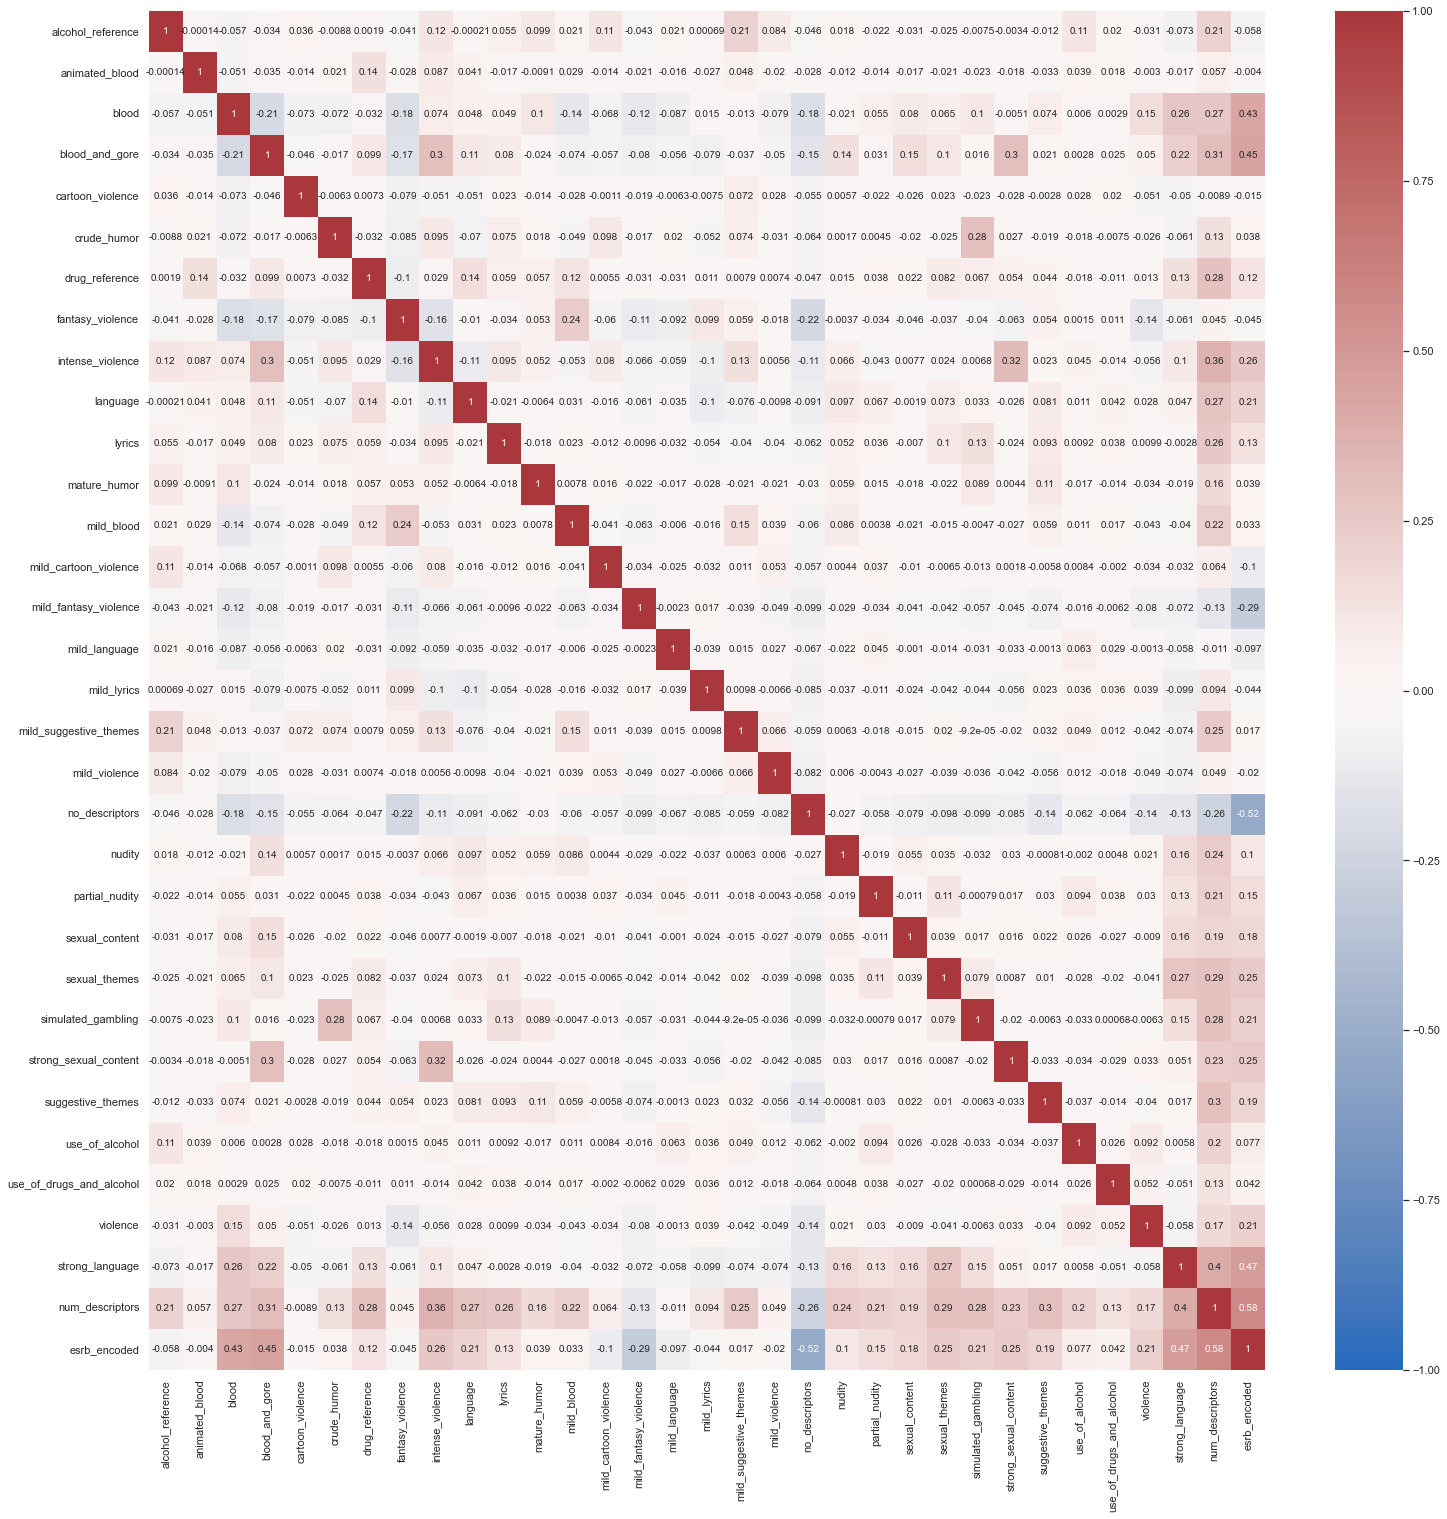

In [ ]:


plt.figure(figsize=(25, 25))

sns.heatmap(df.corr(), cmap="vlag", vmin=-1, vmax=1, annot= True)

We can see that blood, strong laguage and blood and gore are positively correlated with a higher esrb rating

Also the new feature I added is alo highly correlated with a higher rating

We can also see that mild fantasy violence is correlated with a lower esrb rating

Lots of visualisation can be done by making slices of the different ratings using groupby and seeing what categories are most common in the different ratings

Might want to remove no_descriptors from the column names

In [ ]:
selected_features = list(df.columns)

In [ ]:
selected_features

['title',
 'alcohol_reference',
 'animated_blood',
 'blood',
 'blood_and_gore',
 'cartoon_violence',
 'crude_humor',
 'drug_reference',
 'fantasy_violence',
 'intense_violence',
 'language',
 'lyrics',
 'mature_humor',
 'mild_blood',
 'mild_cartoon_violence',
 'mild_fantasy_violence',
 'mild_language',
 'mild_lyrics',
 'mild_suggestive_themes',
 'mild_violence',
 'no_descriptors',
 'nudity',
 'partial_nudity',
 'sexual_content',
 'sexual_themes',
 'simulated_gambling',
 'strong_sexual_content',
 'suggestive_themes',
 'use_of_alcohol',
 'use_of_drugs_and_alcohol',
 'violence',
 'esrb_rating',
 'ReleaseDate',
 'strong_language',
 'num_descriptors',
 'esrb_encoded']

In [ ]:
selected_features.remove("title")
selected_features.remove("esrb_rating")
selected_features.remove("esrb_encoded")
selected_features.remove("no_descriptors")



# cosole can also probably be removed

In [ ]:
selected_features

['alcohol_reference',
 'animated_blood',
 'blood',
 'blood_and_gore',
 'cartoon_violence',
 'crude_humor',
 'drug_reference',
 'fantasy_violence',
 'intense_violence',
 'language',
 'lyrics',
 'mature_humor',
 'mild_blood',
 'mild_cartoon_violence',
 'mild_fantasy_violence',
 'mild_language',
 'mild_lyrics',
 'mild_suggestive_themes',
 'mild_violence',
 'nudity',
 'partial_nudity',
 'sexual_content',
 'sexual_themes',
 'simulated_gambling',
 'strong_sexual_content',
 'suggestive_themes',
 'use_of_alcohol',
 'use_of_drugs_and_alcohol',
 'violence',
 'ReleaseDate',
 'strong_language',
 'num_descriptors']

In [ ]:
X = df[selected_features]

y = df["esrb_rating"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

Going to split the current dataset for now instead of using the test data

In [ ]:
print("Lenght of our Training data:", y_train.shape[0], "\nLength of our Testing data:", y_test.shape[0])

Lenght of our Training data: 1860 
Length of our Testing data: 465


First will try a normal decision tree and then a random forest

These seem like the best classifiers to use

In [ ]:
model = DecisionTreeClassifier()

In [ ]:
model.fit(X_train,y_train)

ValueError: could not convert string to float: '2019-04-02'

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
print("Accuracy Score: %f" % accuracy)

#precision = precision_score(y_true=y_test, y_pred=y_pred)
#print("Precision Score: %f" % precision)

#recall = recall_score(y_true=y_test, y_pred=y_pred)
#print("Recall Score: %f" % recall)

#f1 = f1_score(y_true=y_test, y_pred=y_pred)
#print('F1 Score: %f' % f1)

# Calculate predicted probabilities
y_pred_proba = model.predict_proba(X_test)

# Keep only the proba for True
y_pred_proba = y_pred_proba[:,1]

# Compute auc score
#auc = roc_auc_score(y_true=y_test, y_score=y_pred_proba)
#print('AUC Score: %f' % auc)

Accuracy Score: 0.858351


Need different metrics for a multiclass classifier

In [ ]:
print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

           E       0.96      0.96      0.96       113
          ET       0.77      0.78      0.78       104
           M       0.87      0.91      0.89        76
           T       0.84      0.82      0.83       180

    accuracy                           0.86       473
   macro avg       0.86      0.87      0.86       473
weighted avg       0.86      0.86      0.86       473



In [ ]:
print(confusion_matrix(y_true=y_test, y_pred=y_pred))

[[108   2   0   3]
 [  4  81   0  19]
 [  0   1  69   6]
 [  1  21  10 148]]


Would be nice if it was labeled

Not exactly sure what the order of the class names should be

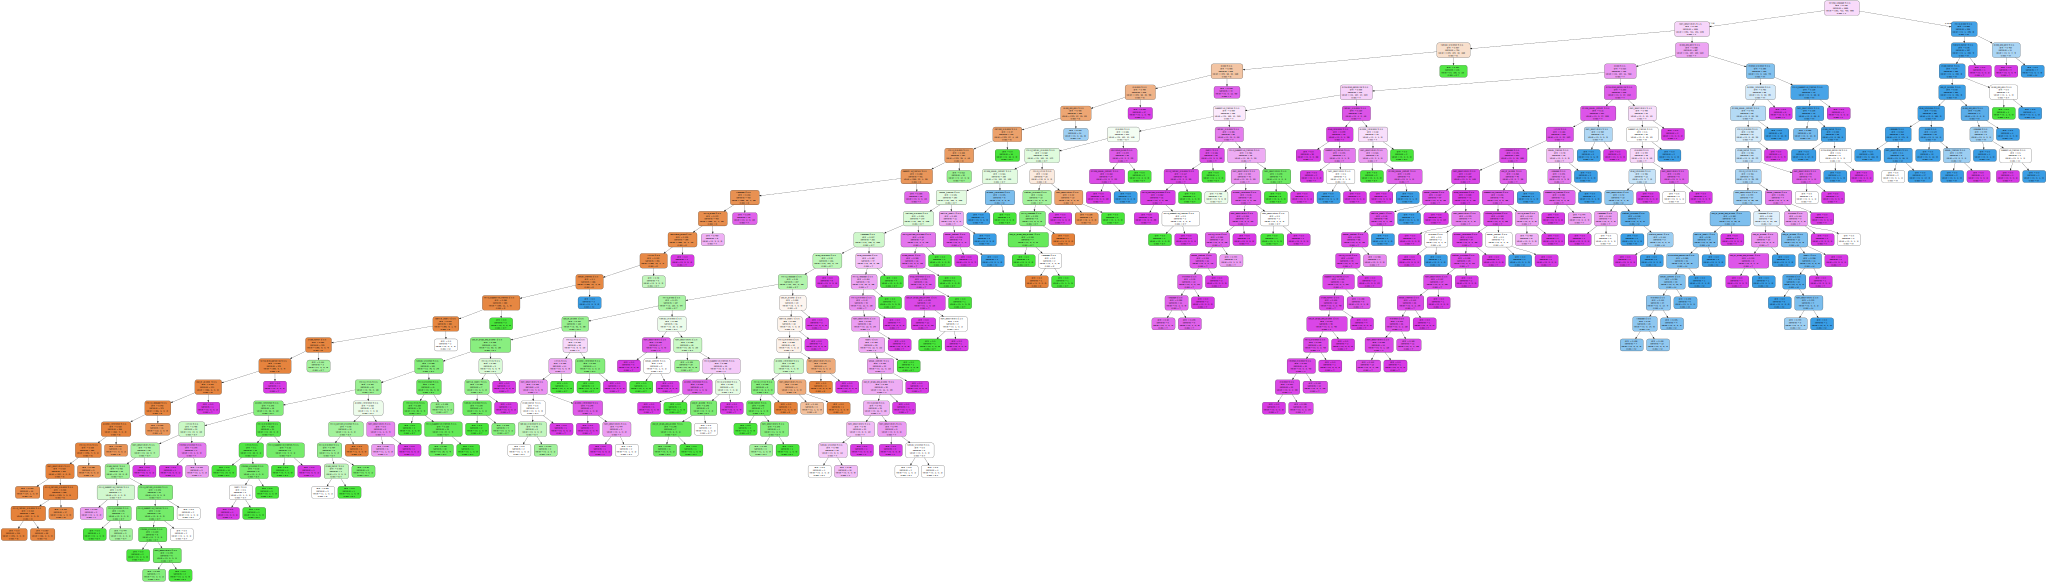

In [ ]:
dot_data = tree.export_graphviz(model, out_file=None, 
                     feature_names=selected_features,
                     class_names=["E", "ET", "M", "T"],
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  

graph

Strong Language is the first split

Could try tuning the parameters

In [ ]:
feature_imp = pd.DataFrame.from_dict( {'feature_importance': model.feature_importances_,
                                       'feature':selected_features }).sort_values('feature_importance', ascending=False)
feature_imp

,feature_importance,feature
30,0.154120,num_descriptors
29,0.149309,strong_language
7,0.142347,fantasy_violence
3,0.099291,blood_and_gore
2,0.087971,blood
28,0.059213,violence
25,0.029770,suggestive_themes
18,0.025956,mild_violence
4,0.025423,cartoon_violence
9,0.022698,language


Now I will do some hyper paramtere tuning

In [ ]:
# params = { 
#     "criterion": ["gini", "entropy"],
#     "max_features": [None, "sqrt", "log2"],
#     "min_samples_split": [32, 35, 38],
#     "max_depth": [ 52, 55, 58, None],
#     #"min_samples_leaf" : [1, 5, 100], # removed this as 1 which is the default always seems to be the nest
#     "splitter" : ["best", "random"]
#     }

In [ ]:
# grid_search_cv =  GridSearchCV( estimator=DecisionTreeClassifier(), 
#     param_grid=params,
#     scoring= "f1_weighted" )

# # need to change the average as multclass is not supported

# # to change the average we need to use none, micro, macro or weighted

In [ ]:
# grid_search_cv.fit(X_train, y_train)

In [ ]:
# print(grid_search_cv.best_params_)

In [ ]:
# model = grid_search_cv.best_estimator_

In [ ]:
# y_pred = model.predict(X_test)
    
# print(metrics.classification_report(y_test, y_pred))

# fig, ax = plt.subplots(figsize=(13,13))

# metrics.plot_confusion_matrix(estimator=model, 
#                               X=X_test, 
#                               y_true=y_test, 
#                               ax=ax,
#                               cmap="Blues")

# # plot_confusion_matrix will be deprecated so should change the plotting method used

I think the order of the classes should reflect the progression of the ratings

M should be the last class

In [ ]:
# dot_data = tree.export_graphviz(model, out_file=None, 
#                      feature_names=selected_features,
#                      class_names=["E", "ET", "M", "T"],
#                      filled=True, rounded=True,  
#                      special_characters=True)  
# graph = graphviz.Source(dot_data)  

# graph

In [ ]:
# feature_imp = pd.DataFrame.from_dict( {'feature_importance': model.feature_importances_,
#                                        'feature':selected_features }).sort_values('feature_importance', ascending=False)
# feature_imp

Hyper Paramteter tuning did not help the models

They are still only about 80% accurate

In [ ]:
model = RandomForestClassifier()

In [ ]:
model.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

           E       0.96      0.96      0.96       113
          ET       0.81      0.80      0.81       104
           M       0.87      0.89      0.88        76
           T       0.84      0.84      0.84       180

    accuracy                           0.87       473
   macro avg       0.87      0.87      0.87       473
weighted avg       0.87      0.87      0.87       473



In [ ]:
print(confusion_matrix(y_true=y_test, y_pred=y_pred))

[[108   2   0   3]
 [  4  83   0  17]
 [  0   0  68   8]
 [  1  17  10 152]]


              precision    recall  f1-score   support

           E       0.96      0.96      0.96       113
          ET       0.81      0.80      0.81       104
           M       0.87      0.89      0.88        76
           T       0.84      0.84      0.84       180

    accuracy                           0.87       473
   macro avg       0.87      0.87      0.87       473
weighted avg       0.87      0.87      0.87       473



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


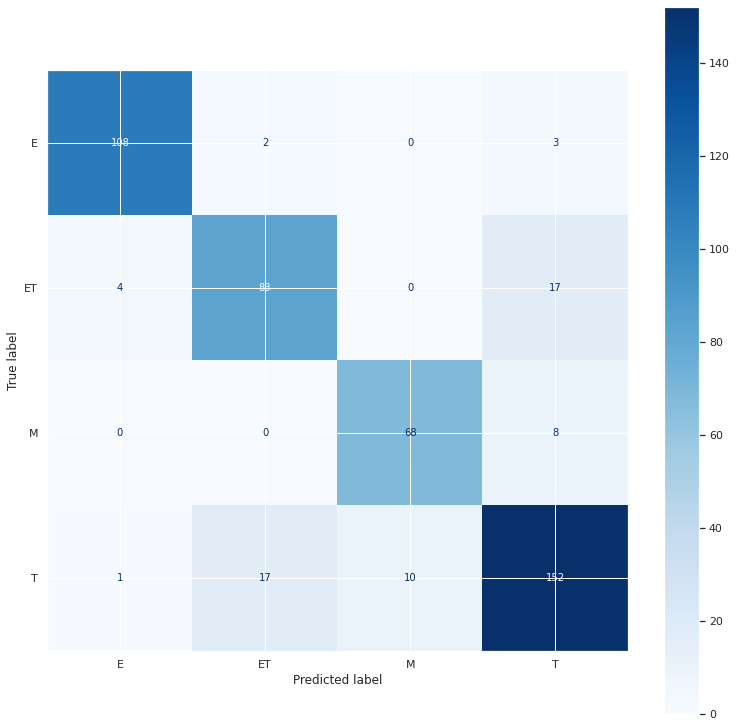

In [ ]:
y_pred = model.predict(X_test)
    
print(metrics.classification_report(y_test, y_pred))

fig, ax = plt.subplots(figsize=(13,13))

metrics.plot_confusion_matrix(estimator=model, 
                              X=X_test, 
                              y_true=y_test, 
                              ax=ax,
                              cmap="Blues")

In [ ]:
feature_imp = pd.DataFrame.from_dict( {'feature_importance': model.feature_importances_,
                                       'feature':selected_features }).sort_values('feature_importance', ascending=False)
feature_imp

,feature_importance,feature
30,0.141054,num_descriptors
7,0.137049,fantasy_violence
29,0.116026,strong_language
2,0.092983,blood
3,0.086665,blood_and_gore
28,0.058103,violence
25,0.030492,suggestive_themes
9,0.027022,language
24,0.026587,strong_sexual_content
18,0.025029,mild_violence


Not much improvement from the regualr decision tree

Maybe would be better with tuning

In [ ]:
# params = {
#     "max_features": [None, "sqrt", "log2"],
#     "min_samples_split": [40, 38, 42],
#     "max_depth":  [ 58, 60, 62 , None],
#     #"min_samples_leaf" : [1, 10, 100],
#     "n_estimators" : [80, 100, 120 ],
#     "criterion" : ["gini", "entropy"]
# }

In [ ]:
# grid_search_cv = GridSearchCV( estimator=RandomForestClassifier(), 
#     param_grid=params,
#     scoring="f1_weighted" )


In [ ]:
# grid_search_cv.fit(X_train, y_train)

In [ ]:
# print(grid_search_cv.best_params_)

In [ ]:
# model = grid_search_cv.best_estimator_

In [ ]:
# y_pred = model.predict(X_test)
    
# print(metrics.classification_report(y_test, y_pred))

# fig, ax = plt.subplots(figsize=(13,13))

# metrics.plot_confusion_matrix(estimator=model, 
#                               X=X_test, 
#                               y_true=y_test, 
#                               ax=ax,
#                               cmap="Blues")

In [ ]:
# feature_imp = pd.DataFrame.from_dict( {'feature_importance': model.feature_importances_,
#                                        'feature':selected_features }).sort_values('feature_importance', ascending=False)
# feature_imp

Final model Selected is the default Random Forest Tree

In [ ]:
final_model = RandomForestClassifier()

In [ ]:
X = df[selected_features]

y = df["esrb_rating"]

Training the data on the whole dataset and passing in the test set just to check the accuracy

This should be fine as even though the model has seen all the data games with the exact same descriptors can get different ratings 

In [ ]:
final_model.fit(X, y)

RandomForestClassifier()

In [ ]:
y_pred = final_model.predict(X_test)

In [ ]:
print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

           E       0.96      0.96      0.96       113
          ET       0.87      0.90      0.89       104
           M       0.92      0.95      0.94        76
           T       0.93      0.89      0.91       180

    accuracy                           0.92       473
   macro avg       0.92      0.93      0.92       473
weighted avg       0.92      0.92      0.92       473



In [ ]:
print(confusion_matrix(y_true=y_test, y_pred=y_pred))

[[109   1   0   3]
 [  4  94   0   6]
 [  0   0  72   4]
 [  0  13   6 161]]


              precision    recall  f1-score   support

           E       0.96      0.96      0.96       113
          ET       0.87      0.90      0.89       104
           M       0.92      0.95      0.94        76
           T       0.93      0.89      0.91       180

    accuracy                           0.92       473
   macro avg       0.92      0.93      0.92       473
weighted avg       0.92      0.92      0.92       473



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


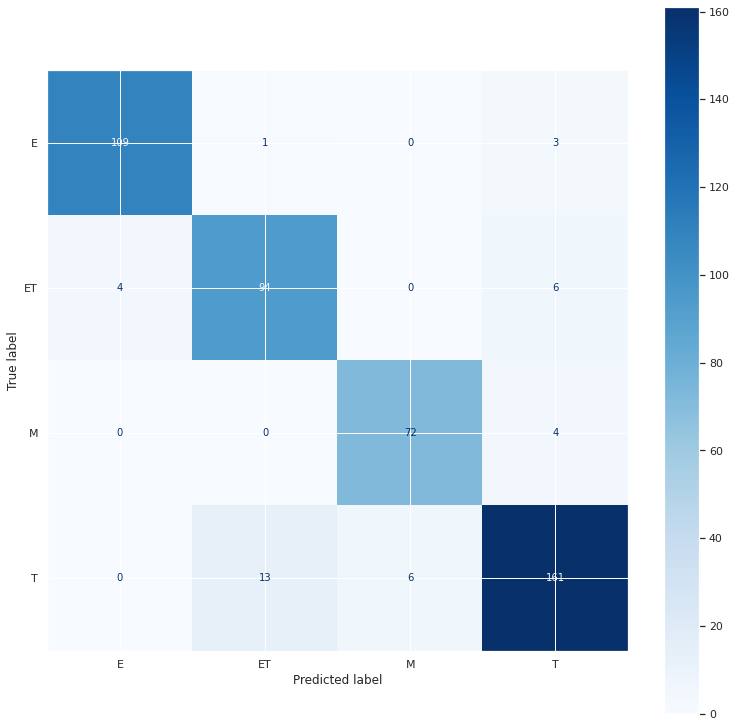

In [ ]:
y_pred = final_model.predict(X_test)
    
print(metrics.classification_report(y_test, y_pred))

fig, ax = plt.subplots(figsize=(13,13))

metrics.plot_confusion_matrix(estimator=final_model, 
                              X=X_test, 
                              y_true=y_test, 
                              ax=ax,
                              cmap="Blues")

In [ ]:
feature_imp = pd.DataFrame.from_dict( {'feature_importance': final_model.feature_importances_,
                                       'feature':selected_features }).sort_values('feature_importance', ascending=False)
feature_imp

,feature_importance,feature
7,0.139255,fantasy_violence
30,0.136292,num_descriptors
29,0.119717,strong_language
2,0.104098,blood
3,0.079324,blood_and_gore
28,0.059141,violence
25,0.030778,suggestive_themes
9,0.027496,language
24,0.025013,strong_sexual_content
4,0.023618,cartoon_violence


Training with all the data increased the accuracy to 91%

Maybe remove the console question

In [ ]:
high_impact_descriptors = ["strong_language", "fantasy_violence", "blood_and_gore", "blood", "mild_fantasy_violence"]

In [ ]:
selected_features

['alcohol_reference',
 'animated_blood',
 'blood',
 'blood_and_gore',
 'cartoon_violence',
 'crude_humor',
 'drug_reference',
 'fantasy_violence',
 'intense_violence',
 'language',
 'lyrics',
 'mature_humor',
 'mild_blood',
 'mild_cartoon_violence',
 'mild_fantasy_violence',
 'mild_language',
 'mild_lyrics',
 'mild_suggestive_themes',
 'mild_violence',
 'nudity',
 'partial_nudity',
 'sexual_content',
 'sexual_themes',
 'simulated_gambling',
 'strong_sexual_content',
 'suggestive_themes',
 'use_of_alcohol',
 'use_of_drugs_and_alcohol',
 'violence',
 'strong_language',
 'num_descriptors']

In [ ]:
count = 0

new_game_values = []

for descriptor in selected_features:

  

  if (descriptor == "num_descriptors"):
    print()

  else:


    print("Does your game have", descriptor, "?")
    answer = input("Enter y for yes and anything else for no:     ")

    print("**********************************************************************")

    if(answer == "y"):
      new_game_values.append(1)

      count = count + 1

    else:
      new_game_values.append(0)




    
new_game_values.append(count)

# this works as it is the last feature

Does your game have alcohol_reference ?
Enter y for yes and anything else for no:     n
**********************************************************************
Does your game have animated_blood ?
Enter y for yes and anything else for no:     n
**********************************************************************
Does your game have blood ?
Enter y for yes and anything else for no:     n
**********************************************************************
Does your game have blood_and_gore ?
Enter y for yes and anything else for no:     n
**********************************************************************
Does your game have cartoon_violence ?
Enter y for yes and anything else for no:     n
**********************************************************************
Does your game have crude_humor ?
Enter y for yes and anything else for no:     n
**********************************************************************
Does your game have drug_reference ?
Enter y for yes and anything else 

In [ ]:
new_game_values

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

Can look at the correlations to see what impact the high importance features have.

I am not sure how to handle multiple categories that seem to cover similar topics

For example

Blood

and

Blood and Gore

Should they both be answered or does one supercede the other




In [ ]:
new_game_df = pd.DataFrame([new_game_values], columns=selected_features)

In [ ]:
new_game_df

,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,intense_violence,language,...,sexual_content,sexual_themes,simulated_gambling,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence,strong_language,num_descriptors
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
y_pred = final_model.predict(new_game_df)

In [ ]:
y_pred

array(['E'], dtype=object)

In [ ]:
y_pred_proba = final_model.predict_proba(new_game_df)

In [ ]:
y_pred_proba

array([[0.94276454, 0.05723546, 0.        , 0.        ]])

In [ ]:
df.esrb_rating.value_counts(normalize=True)

T     0.366638
ET    0.218459
E     0.213378
M     0.201524
Name: esrb_rating, dtype: float64

E, ET, M T

There seems to be a bias towars rating games T 

Probably because of the unbalanced nature of the dataset

              precision    recall  f1-score   support

           E       0.97      0.98      0.97       504
          ET       0.85      0.92      0.88       516
           M       0.94      0.93      0.94       476
           T       0.92      0.88      0.90       866

    accuracy                           0.92      2362
   macro avg       0.92      0.93      0.92      2362
weighted avg       0.92      0.92      0.92      2362



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


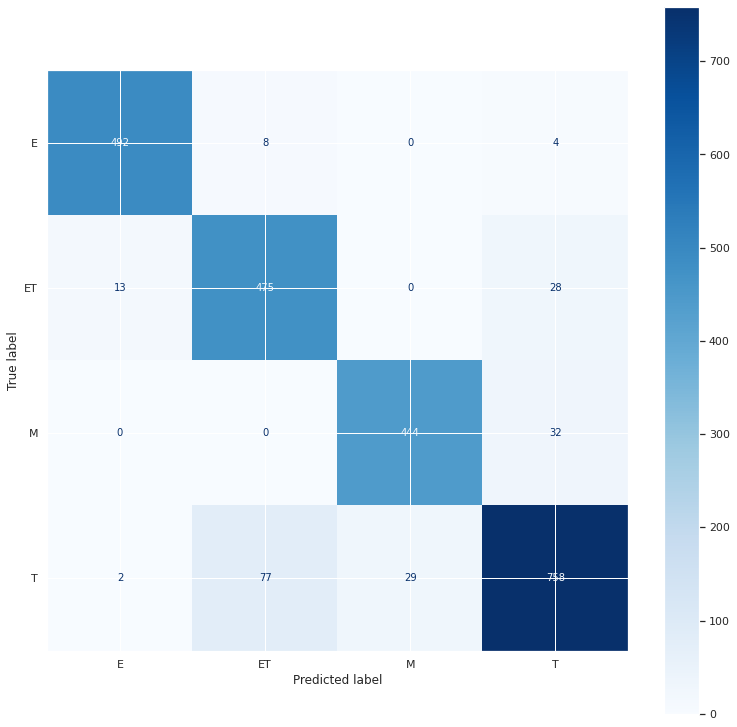

In [ ]:
y_pred = final_model.predict(X)
    
print(metrics.classification_report(y, y_pred))

fig, ax = plt.subplots(figsize=(13,13))

metrics.plot_confusion_matrix(estimator=final_model, 
                              X=X, 
                              y_true=y, 
                              ax=ax,
                              cmap="Blues")

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
from sklearn.metrics import plot_confusion_matrix

In [ ]:
# Initalize our model.
model = MultinomialNB(alpha=.05)


# Fit our model with our training data.
model.fit(X_train, y_train)


# Make new predictions of our testing data. 
y_pred = model.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred, target_names=model.classes_))

              precision    recall  f1-score   support

           E       0.88      0.32      0.47       113
          ET       0.76      0.81      0.78       104
           M       0.85      0.82      0.83        76
           T       0.59      0.82      0.69       180

    accuracy                           0.70       473
   macro avg       0.77      0.69      0.69       473
weighted avg       0.74      0.70      0.68       473



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


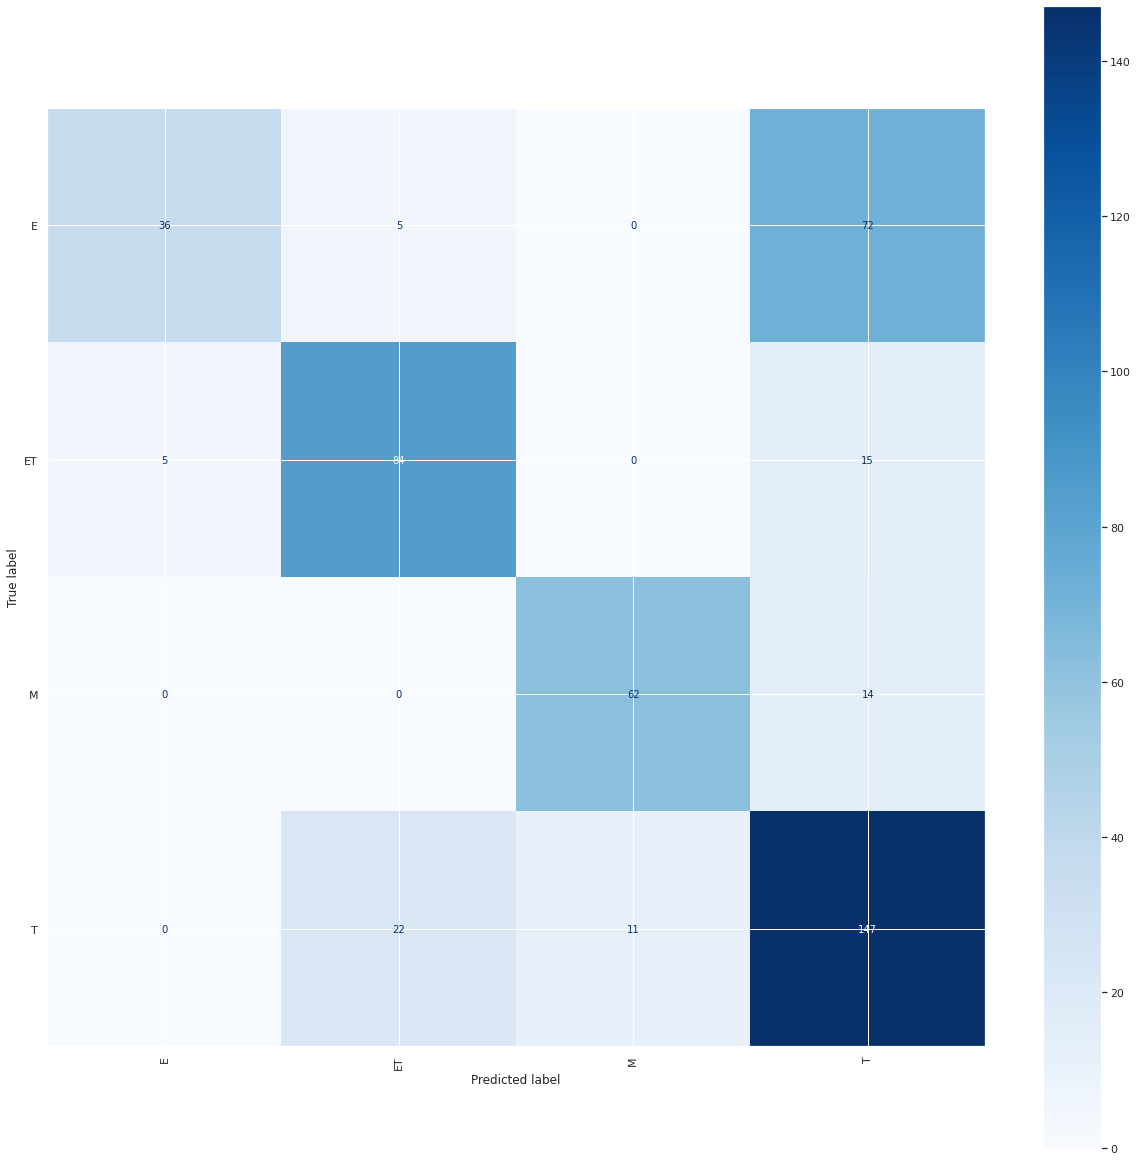

In [ ]:
# Plot the confusion matrix of our results
fig, ax = plt.subplots(figsize=(21, 21))

disp = plot_confusion_matrix(model, X_test, y_test,
                             display_labels=model.classes_,
                             cmap=plt.cm.Blues, ax=ax)
plt.xticks(rotation=90)
disp

In [ ]:
# Initalize our model.
model = MultinomialNB(alpha=.05)


# Fit our model with our training data.
model.fit(X, y)


# Make new predictions of our testing data. 
y_pred = model.predict(X)

              precision    recall  f1-score   support

           E       0.84      0.34      0.48       504
          ET       0.76      0.83      0.79       516
           M       0.89      0.86      0.87       476
           T       0.60      0.78      0.68       866

    accuracy                           0.71      2362
   macro avg       0.77      0.70      0.71      2362
weighted avg       0.74      0.71      0.70      2362



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


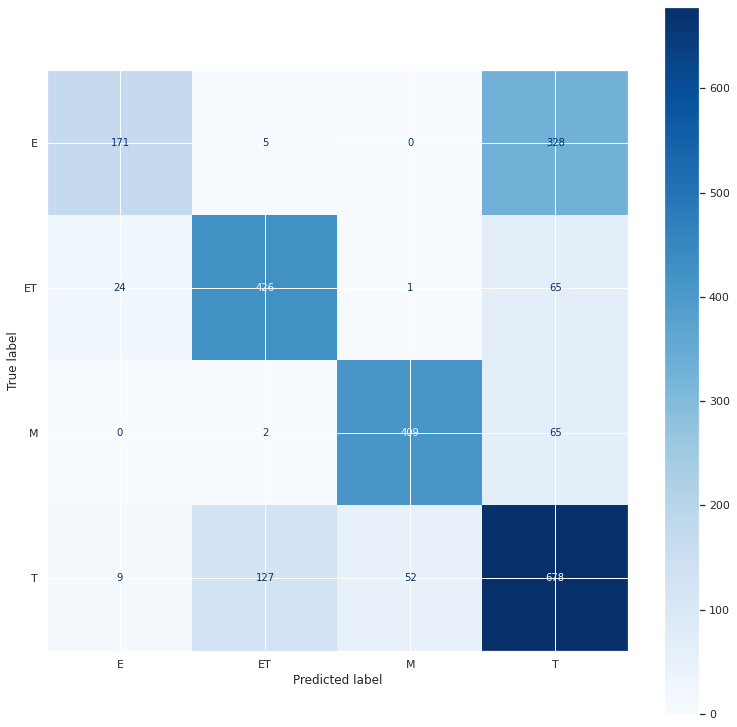

In [ ]:
y_pred = model.predict(X)
    
print(metrics.classification_report(y, y_pred))

fig, ax = plt.subplots(figsize=(13,13))

metrics.plot_confusion_matrix(estimator=model, 
                              X=X, 
                              y_true=y, 
                              ax=ax,
                              cmap="Blues")

Random Forest is still the best

In [ ]:
test_df_2 = df[df["num_descriptors"] == 0]

In [ ]:
test_df_2[df["esrb_rating"] == "ET"]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,title,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,intense_violence,...,simulated_gambling,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence,esrb_rating,strong_language,num_descriptors,esrb_encoded
900,Project Highrise - Architect's Edition,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,ET,0,0,1


A K-means Clustering algorithm to try and see if there is a better way to do this

https://github.com/aadejare/new_esrb_rating/blob/main/new_esrb_rating.ipynb

Based on code from here which works on the same dataset

In [ ]:
import xgboost as xgb


In [ ]:
vgxgb = xgb.XGBClassifier(random_state=531)
vgxgb2 = vgxgb.fit(X_train,y_train)

In [ ]:
y_pred = vgxgb2.predict(X_test)

              precision    recall  f1-score   support

           E       0.90      0.96      0.93       113
          ET       0.86      0.77      0.81       104
           M       0.85      0.80      0.82        76
           T       0.80      0.83      0.82       180

    accuracy                           0.85       473
   macro avg       0.85      0.84      0.85       473
weighted avg       0.85      0.85      0.84       473



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


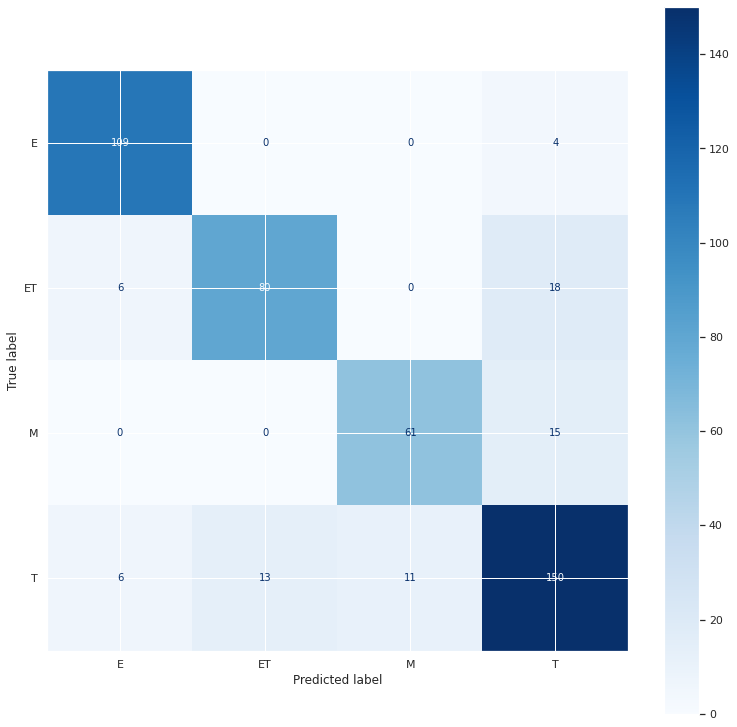

In [ ]:

print(metrics.classification_report(y_test, y_pred))

fig, ax = plt.subplots(figsize=(13,13))

metrics.plot_confusion_matrix(estimator=vgxgb2, 
                              X=X_test, 
                              y_true=y_test, 
                              ax=ax,
                              cmap="Blues")

Not better than Random forest

K Means Clustering

Based on same code

In [ ]:
videogame2 = pd.get_dummies(df, columns=['esrb_rating']).copy()

In [ ]:
videogame2.head()

,title,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,intense_violence,...,use_of_alcohol,use_of_drugs_and_alcohol,violence,strong_language,num_descriptors,esrb_encoded,esrb_rating_E,esrb_rating_ET,esrb_rating_M,esrb_rating_T
0,Monster Jam Steel Titans 2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
1,Subnautica: Below Zero,0,1,0,0,0,0,0,0,1,...,0,0,0,0,3,1,0,1,0,0
2,NIER REPLICANT VER.1.22474487139…,0,0,1,0,0,0,0,0,0,...,0,0,0,1,3,3,0,0,1,0
3,Jamestown+,0,0,0,0,0,0,0,1,0,...,0,0,0,0,3,1,0,1,0,0
4,Neptunia Virtual Stars,0,0,0,0,0,0,0,1,0,...,0,0,0,0,3,2,0,0,0,1


In [ ]:
ratings=['esrb_rating_E','esrb_rating_ET','esrb_rating_M','esrb_rating_T']

In [ ]:
X = videogame2[selected_features]

y = videogame2[ratings]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

In [ ]:
from sklearn.cluster import KMeans

# maybe try hyper parameter tuning

# a bit difficlut to do since this is a blind algorithm

# 6 gives us very nice E and ET clusters

# 8 gives us a nice E and M cluster

# 10 gives us some decent E, ET an M clusters

# T is the hardest to cluster
# maybe because it is the most numerous
# also maybe because it is a bit of an edge category between ET and M
# maybe the dividing line is a bit more gray

In [ ]:
model = KMeans(n_clusters = 11, n_init = 11, max_iter = 300)

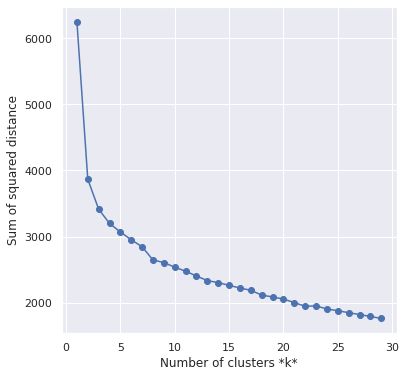

In [ ]:
sse = []
list_k = list(range(1, 30))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(X_train)
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance');

The more categories the better the clusters
Maybe we would be better with new data

In [ ]:
params = {
    "n_clusters": [3, 4, 5, 6],
    "n_init": [5, 10, 15],
    "max_iter":  [ 200, 300, 400],
    
    "algorithm" : ["elkan", "auto", "full"]
}

In [ ]:
# grid_search_cv =  GridSearchCV( estimator=KMeans(), 
#     param_grid=params,
#     scoring= "accuracy" )

# does not work because we do not have labaled data

In [ ]:
# grid_search_cv.fit(X_train, y_train)

In [ ]:
# print(grid_search_cv.best_params_)

In [ ]:
# model = grid_search_cv.best_estimator_

In [ ]:
model.fit(X_train)

KMeans(n_clusters=11, n_init=11)

In [ ]:
rate_clust = y_train.copy()

In [ ]:
rate_clust = rate_clust.reset_index()
rate_clust['cluster'] = pd.Series(model.predict(X_train))

In [ ]:
rate_clust.head()

,index,esrb_rating_E,esrb_rating_ET,esrb_rating_M,esrb_rating_T,cluster
0,289,0,0,0,1,2
1,1883,0,0,1,0,0
2,1300,0,0,0,1,3
3,973,0,0,0,1,3
4,594,0,0,1,0,9


In [ ]:
rate_clust2 = pd.get_dummies(rate_clust, columns=['cluster']).copy()
rate_clust2.drop('index', axis=1).corr('spearman')

,esrb_rating_E,esrb_rating_ET,esrb_rating_M,esrb_rating_T,cluster_0,cluster_1,cluster_2,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8,cluster_9,cluster_10
esrb_rating_E,1.000000,-0.269830,-0.264798,-0.385800,-0.118864,0.351155,-0.146210,0.543386,-0.146210,-0.029580,-0.121425,-0.201826,-0.129475,-0.136581,-0.146635
esrb_rating_ET,-0.269830,1.000000,-0.273742,-0.398830,-0.117070,-0.061436,-0.146302,-0.182547,-0.029993,0.156282,-0.102733,0.594164,0.016882,-0.141194,-0.040904
esrb_rating_M,-0.264798,-0.273742,1.000000,-0.391392,0.425401,-0.105389,-0.016070,-0.231423,0.282740,-0.108995,0.205125,-0.200959,-0.082380,0.038011,0.052265
esrb_rating_T,-0.385800,-0.398830,-0.391392,1.000000,-0.160727,-0.153547,0.262459,-0.104425,-0.091266,-0.016685,0.016252,-0.169459,0.164566,0.204017,0.114257
cluster_0,-0.118864,-0.117070,0.425401,-0.160727,1.000000,-0.047307,-0.066583,-0.149876,-0.066583,-0.048926,-0.055296,-0.091910,-0.058962,-0.062198,-0.080284
cluster_1,0.351155,-0.061436,-0.105389,-0.153547,-0.047307,1.000000,-0.058191,-0.130986,-0.058191,-0.042760,-0.048327,-0.080326,-0.051531,-0.054359,-0.070166
cluster_2,-0.146210,-0.146302,-0.016070,0.262459,-0.066583,-0.058191,1.000000,-0.184357,-0.081901,-0.060183,-0.068018,-0.113055,-0.072527,-0.076508,-0.098755
cluster_3,0.543386,-0.182547,-0.231423,-0.104425,-0.149876,-0.130986,-0.184357,1.000000,-0.184357,-0.135469,-0.153106,-0.254483,-0.163255,-0.172216,-0.222293
cluster_4,-0.146210,-0.029993,0.282740,-0.091266,-0.066583,-0.058191,-0.081901,-0.184357,1.000000,-0.060183,-0.068018,-0.113055,-0.072527,-0.076508,-0.098755
cluster_5,-0.029580,0.156282,-0.108995,-0.016685,-0.048926,-0.042760,-0.060183,-0.135469,-0.060183,1.000000,-0.049981,-0.083075,-0.053294,-0.056219,-0.072567


We have a decent E cluster but the rest leave some to be desired

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_pred

array([2, 2, 1, 0, 1, 0, 2, 3, 2, 3, 1, 0, 1, 0, 1, 2, 2, 2, 0, 1, 1, 2,
       3, 3, 0, 2, 2, 1, 2, 1, 0, 1, 1, 0, 1, 2, 1, 2, 1, 3, 1, 1, 2, 1,
       3, 1, 2, 1, 3, 2, 1, 1, 1, 3, 1, 1, 1, 0, 1, 1, 1, 1, 2, 1, 0, 1,
       1, 1, 2, 0, 1, 2, 1, 2, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 0, 1,
       2, 1, 2, 0, 1, 1, 2, 3, 0, 1, 3, 1, 2, 3, 3, 2, 1, 1, 1, 2, 1, 3,
       0, 1, 1, 3, 1, 3, 1, 2, 2, 3, 3, 1, 1, 1, 1, 1, 2, 2, 0, 3, 1, 3,
       2, 1, 0, 2, 2, 2, 2, 2, 2, 3, 2, 0, 2, 1, 1, 1, 3, 1, 0, 1, 1, 0,
       1, 3, 2, 2, 1, 1, 3, 3, 3, 2, 2, 2, 0, 1, 2, 2, 2, 1, 1, 1, 1, 2,
       0, 1, 2, 3, 1, 1, 3, 0, 0, 0, 3, 3, 1, 0, 0, 1, 0, 0, 1, 2, 1, 2,
       0, 0, 0, 2, 0, 1, 2, 3, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 3,
       1, 2, 1, 1, 2, 2, 0, 1, 2, 2, 1, 1, 1, 2, 2, 1, 2, 2, 1, 0, 3, 1,
       1, 1, 1, 3, 2, 2, 3, 0, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 2, 1, 1,
       3, 1, 3, 2, 0, 1, 2, 2, 1, 1, 3, 3, 0, 2, 1, 1, 1, 0, 2, 0, 3, 1,
       3, 1, 0, 3, 1, 1, 1, 1, 0, 2, 1, 1, 3, 1, 2,

In [ ]:
y_test

,esrb_rating_E,esrb_rating_ET,esrb_rating_M,esrb_rating_T
1924,0,1,0,0
627,0,0,0,1
1371,1,0,0,0
654,0,1,0,0
969,1,0,0,0
...,...,...,...,...
1957,0,1,0,0
2309,0,0,0,1
1374,0,0,0,1
691,0,1,0,0


In [ ]:
rate_clust_test = y_test.copy()
rate_clust_test = rate_clust_test.reset_index()
rate_clust_test['cluster'] = pd.Series(y_pred)

In [ ]:
rate_clust_test.head(20)

,index,esrb_rating_E,esrb_rating_ET,esrb_rating_M,esrb_rating_T,cluster
0,1924,0,1,0,0,2
1,627,0,0,0,1,2
2,1371,1,0,0,0,1
3,654,0,1,0,0,0
4,969,1,0,0,0,1
5,519,0,0,0,1,0
6,1994,0,0,0,1,2
7,1982,0,0,0,1,3
8,1271,0,1,0,0,2
9,1401,0,0,1,0,3


In [ ]:
rate_clust_test_2 = pd.get_dummies(rate_clust_test, columns=['cluster']).copy()
rate_clust_test_2.drop('index', axis=1).corr('spearman')

,esrb_rating_E,esrb_rating_ET,esrb_rating_M,esrb_rating_T,cluster_0,cluster_1,cluster_2,cluster_3
esrb_rating_E,1.000000,-0.297435,-0.245132,-0.439127,-0.235453,0.583286,-0.280268,-0.227595
esrb_rating_ET,-0.297435,1.000000,-0.232282,-0.416108,-0.094483,-0.029418,0.276018,-0.215664
esrb_rating_M,-0.245132,-0.232282,1.000000,-0.342937,0.315787,-0.322901,-0.013491,0.152469
esrb_rating_T,-0.439127,-0.416108,-0.342937,1.000000,0.048533,-0.242949,0.020901,0.268530
cluster_0,-0.235453,-0.094483,0.315787,0.048533,1.000000,-0.365978,-0.260099,-0.170722
cluster_1,0.583286,-0.029418,-0.322901,-0.242949,-0.365978,1.000000,-0.538966,-0.353764
cluster_2,-0.280268,0.276018,-0.013491,0.020901,-0.260099,-0.538966,1.000000,-0.251418
cluster_3,-0.227595,-0.215664,0.152469,0.268530,-0.170722,-0.353764,-0.251418,1.000000


In [ ]:
print(metrics.classification_report(y_test, y_pred))

fig, ax = plt.subplots(figsize=(13,13))

metrics.plot_confusion_matrix(estimator=model, 
                              X=X_test, 
                              y_true=y_test, 
                              ax=ax,
                              cmap="Blues")

NameError: name 'y_test' is not defined